In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zippath = '/content/drive/MyDrive/census+income+kdd.zip'
destpath = '/content/drive/MyDrive'
dataset =  '/content/drive/MyDrive'

In [ ]:
import zipfile

# Replace 'your_zip_file.zip' with the actual name of your uploaded ZIP file
zip_file_name = zippath

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(destpath)  # You can replace 'extracted_folder' with the desired extraction path

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/census-income.data',header=None, sep=',\s', na_values=["?"])

<ipython-input-5-e0d187e05329>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataset = pd.read_csv('/content/drive/MyDrive/census-income.data',header=None, sep=',\s', na_values=["?"])


In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [ ]:
column_names = ['age',
                'class_of_worker',
                'industry_code',
                'occupation_code',
                'education',
                'wage_per_hour',
                'enrolled_in_edu_inst_last_wk',
                'marital_status',
                'major_industry_code',
                'major_occupation_code',
                'race',
                'hispanic_Origin',
                'sex',
                'member_of_a_labor_union',
                'reason_for_unemployment',
                'full_or_part_time_employment_stat',
                'capital_gains',
                'capital_losses',
                'divdends_from_stocks',
                'tax_filer_status',
                'region_of_previous_residence',
                'state_of_previous_residence',
                'detailed_household_and_family_stat',
                'detailed_household_summary_in_household',
                'instance_weight',
                'migration_code_change_in_msa',
                'migration_code_change_in_reg',
                'migration_code_move_within_reg',
                'live_in_this_house_1_year_ago',
                'migration_prev_res_in_sunbelt',
                'num_persons_worked_for_employer',
                'family_members_under_18',
                'country_of_birth_father',
                'country_of_birth_mother',
                'country_of_birth_self',
                'citizenship',
                'own_business_or_self_employed',
                'fill_inc_questionnaire_for_veterans_admin',
                'veterans_benefits',
                'weeks_worked_in_year',
                'year',
                'income']

In [ ]:
dataset.columns=column_names

In [ ]:
dataset.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class_of_worker                            199523 non-null  object 
 2   industry_code                              199523 non-null  int64  
 3   occupation_code                            199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage_per_hour                              199523 non-null  int64  
 6   enrolled_in_edu_inst_last_wk               199523 non-null  object 
 7   marital_status                             199523 non-null  object 
 8   major_industry_code                        199523 non-null  object 
 9   major_occupation_code                      199523 non-null  object 
 10  race    

In [ ]:
dataset['migration_prev_res_in_sunbelt'].unique()

array([nan, 'Yes', 'Not in universe', 'No'], dtype=object)

In [ ]:
dataset.isnull().sum()

age                                              0
class_of_worker                                  0
industry_code                                    0
occupation_code                                  0
education                                        0
wage_per_hour                                    0
enrolled_in_edu_inst_last_wk                     0
marital_status                                   0
major_industry_code                              0
major_occupation_code                            0
race                                             0
hispanic_Origin                                874
sex                                              0
member_of_a_labor_union                          0
reason_for_unemployment                          0
full_or_part_time_employment_stat                0
capital_gains                                    0
capital_losses                                   0
divdends_from_stocks                             0
tax_filer_status               

In [ ]:
dataset.shape

(199523, 42)

##### So we have Total 199523 rows and 42 columns

In [ ]:
len(dataset.loc[ (dataset['migration_code_change_in_msa'].isnull()) & ((dataset['migration_code_change_in_reg'].isnull())) & (dataset['migration_code_move_within_reg'].isnull()) & ((dataset['migration_prev_res_in_sunbelt'].isnull()))    ])

99696

migration_code_change_in_msa  and               migration_code_change_in_reg  and               
migration_code_move_within_reg and migration_prev_res_in_sunbelt are inter related with each other in case of missing value

In [ ]:
dataset.dropna(inplace = True)
# Now we tackled with missing data
# check for duplicates
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.isnull().sum()

age                                          0
class_of_worker                              0
industry_code                                0
occupation_code                              0
education                                    0
wage_per_hour                                0
enrolled_in_edu_inst_last_wk                 0
marital_status                               0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_Origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
divdends_from_stocks                         0
tax_filer_status                             0
region_of_previous_residence                 0
state_of_prev

In [ ]:
dataset.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [ ]:
dataset.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.0
mean,34.467119,15.559666,11.620264,56.542351,400.830175,37.744202,190.741727,1728.719139,1.950358,0.175217,1.528727,23.507732,94.0
std,22.069257,18.058396,14.574197,280.652385,4429.638121,272.180188,1945.171465,974.982892,2.338996,0.554323,0.842912,24.413822,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.290000,0.000000,0.000000,0.000000,0.000000,94.0
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1066.060000,0.000000,0.000000,2.000000,0.000000,94.0
50%,33.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1625.300000,1.000000,0.000000,2.000000,10.000000,94.0
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2162.970000,4.000000,0.000000,2.000000,52.000000,94.0
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4356.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,94.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92925 entries, 1 to 199519
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        92925 non-null  int64  
 1   class_of_worker                            92925 non-null  object 
 2   industry_code                              92925 non-null  int64  
 3   occupation_code                            92925 non-null  int64  
 4   education                                  92925 non-null  object 
 5   wage_per_hour                              92925 non-null  int64  
 6   enrolled_in_edu_inst_last_wk               92925 non-null  object 
 7   marital_status                             92925 non-null  object 
 8   major_industry_code                        92925 non-null  object 
 9   major_occupation_code                      92925 non-null  object 
 10  race                 

---  ------                                     --------------  -----  
 - age                           ----             dicrete
 - class_of_worker                 -----           nominal
 - industry_code                 ---             discrete
 -  occupation_code                 ---          discrete
 -   education                         ---       ordinal
 -   wage_per_hour                        ---    discrete  
 -   enrolled_in_edu_inst_last_wk            -- nominal
 -   marital_status                    ----       nominal
 -  major_industry_code                ----           nominal
 -  major_occupation_code              ----       nominal
 -  race                               ----       nominal
 -  hispanic_Origin                        ----   nominal  
 -  sex                                   ----    nominal  
 -  member_of_a_labor_union              ---     nominal
 - reason_for_unemployment               ----     nominal  
 -  full_or_part_time_employment_stat     -----    nominal  
 -  capital_gains                           ----  discrete  
 -  capital_losses                        -----    discrete
 -  divdends_from_stocks                  ---    discrete  
 -  tax_filer_status                       ----   nominal  
 -  region_of_previous_residence           ----   nominal  
 -  state_of_previous_residence            -----   nominal
 -  detailed_household_and_family_stat      --------  nominal
 -  detailed_household_summary_in_household ----  nominal
 -  instance_weight                        -----   discrete
 -  migration_code_change_in_msa            -----  nominal
 -  migration_code_change_in_reg             ---- nominal
 -  migration_code_move_within_reg           ---- nominal  
 -  live_in_this_house_1_year_ago            ---- nominal
 -  migration_prev_res_in_sunbelt            ----- nominal  
 -  num_persons_worked_for_employer         -----  discrete
 -  family_members_under_18                 -----  nominal
 - country_of_birth_father                  -----  nominal
 -  country_of_birth_mother                 ----  nominal  
 -  country_of_birth_self                   -----  nominal  
 -  citizenship                             -----  nominal
 - own_business_or_self_employed             ---- discrete
 -  fill_inc_questionnaire_for_veterans_admin ---- nominal
 -  veterans_benefits                         ---- discrete
 -  weeks_worked_in_year                      ---- discrete
 -  year                                     -----  discrete

In [ ]:
dataset.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.0
mean,34.467119,15.559666,11.620264,56.542351,400.830175,37.744202,190.741727,1728.719139,1.950358,0.175217,1.528727,23.507732,94.0
std,22.069257,18.058396,14.574197,280.652385,4429.638121,272.180188,1945.171465,974.982892,2.338996,0.554323,0.842912,24.413822,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.290000,0.000000,0.000000,0.000000,0.000000,94.0
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1066.060000,0.000000,0.000000,2.000000,0.000000,94.0
50%,33.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1625.300000,1.000000,0.000000,2.000000,10.000000,94.0
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2162.970000,4.000000,0.000000,2.000000,52.000000,94.0
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4356.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,94.0


- 50000.    87483
50000+.      5442
Name: income, dtype: int64


<Axes: ylabel='income'>

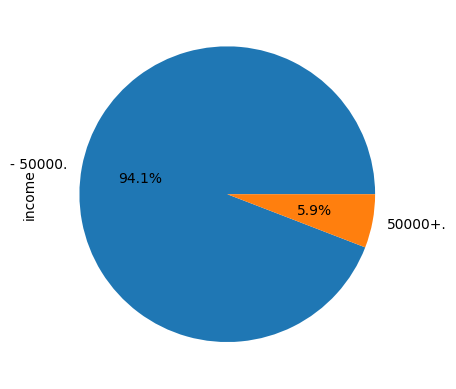

In [ ]:
print(dataset['income'].value_counts())
dataset['income'].value_counts().plot.pie(autopct= '%1.1f%%')

-- we can clearly see that adults with income less than 50000 are almost 16 times greater than adults with income greater than 50000.

#### DISCRETE FEATURE DISTRIBUTION

In [ ]:
dis_fea=[]

Text(0, 0.5, 'count')

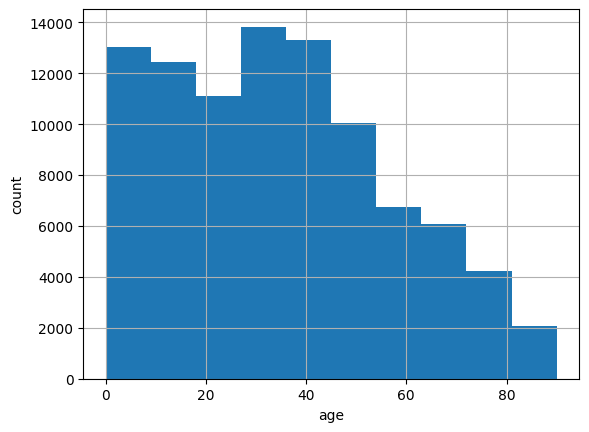

In [ ]:
dataset['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

-- Age is right skewed and not syymetric

In [ ]:
dis_fea.append('age')

#### industry code distribution

Text(0, 0.5, 'count')

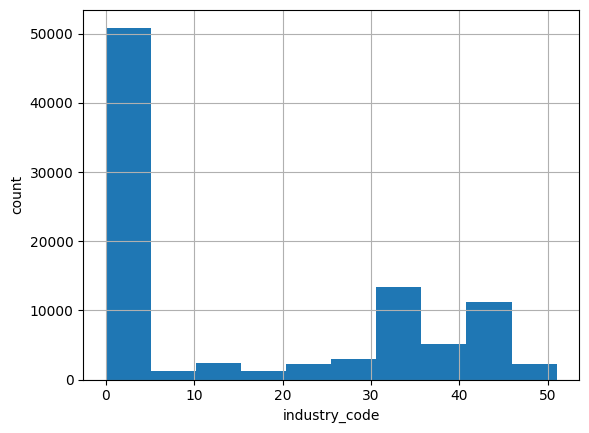

In [ ]:
dataset['industry_code'].hist()
plt.xlabel('industry_code')
plt.ylabel('count')

- industry_code is that important feature and from dataset.

In [ ]:
dis_fea.append('industry_code')

#### occupation code distribution

Text(0, 0.5, 'count')

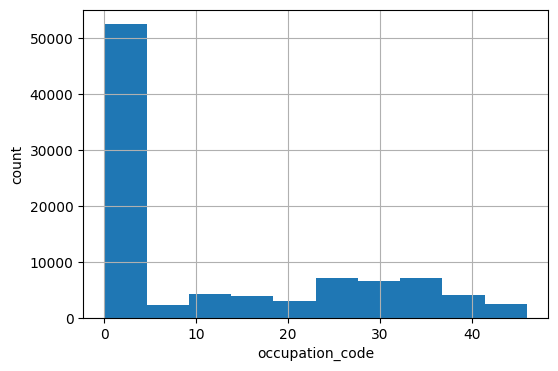

In [ ]:
dataset['occupation_code'].hist(figsize=(6,4))
plt.xlabel('occupation_code')
plt.ylabel('count')

-occupation_code is a important feature.

In [ ]:
dis_fea.append('occupation_code')

### wage per hour distribution

Text(0, 0.5, 'count')

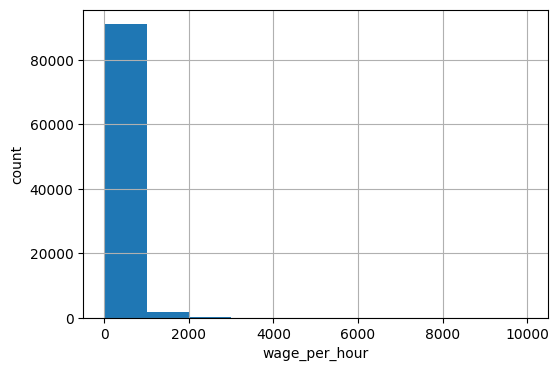

In [ ]:
dataset['wage_per_hour'].hist(figsize=(6,4))
plt.xlabel('wage_per_hour')
plt.ylabel('count')

- wage-per-hour shows that either a person has no wage or has wage of very large amount(80000). Also from dataset.describe() we can see that most of value are zero, so we can even remove this, we can have two approach that with or without this features can then can take the better one, but here again for simplicity we will remove this column, this column does not making significant role in result, since most of the values is zero.

#### capital_gain distribution


Text(0, 0.5, 'count')

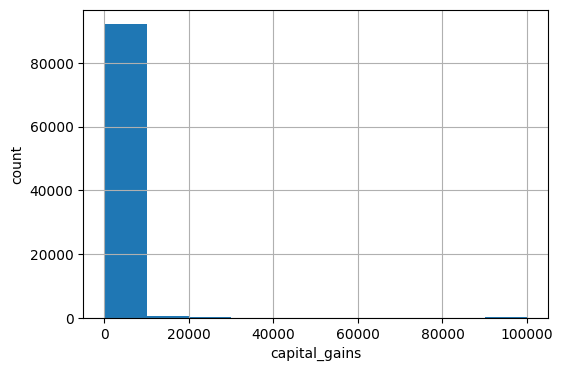

In [ ]:
dataset['capital_gains'].hist(figsize=(6,4))
plt.xlabel('capital_gains')
plt.ylabel('count')

- capital-gain shows that either a person has no gain or has gain of very large amount(80000). Also from dataset.describe() we can see that most of value are zero, so we can even remove this, we can have two approach that with or without this features can then can take the better one, but here again for simplicity we will remove this column, this column does not making significant role in result, since most of the values is zero.

#### capital_losses distribution

Text(0, 0.5, 'count')

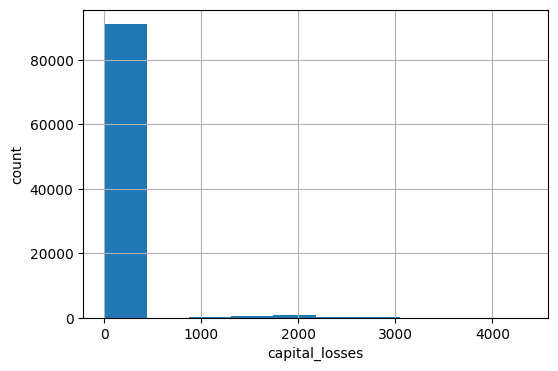

In [ ]:
dataset['capital_losses'].hist(figsize=(6,4))
plt.xlabel('capital_losses')
plt.ylabel('count')

- capital-losses shows that either a person has no losses or has losses of very large amount(80000). Also from dataset.describe() we can see that most of value are zero, so we can even remove this, we can have two approach that with or without this features can then can take the better one, but here again for simplicity we will remove this column, this column does not making significant role in result, since most of the values is zero.

### dividend_from_stocks

Text(0, 0.5, 'count')

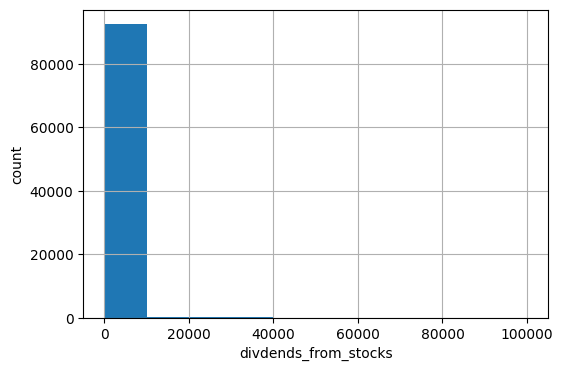

In [ ]:
dataset['divdends_from_stocks'].hist(figsize=(6,4))
plt.xlabel('divdends_from_stocks')
plt.ylabel('count')

- dividends_from_stack shows that either a person has no stack or has stack of very large amount(80000). Also from dataset.describe() we can see that most of value are zero, so we can even remove this, we can have two approach that with or without this features can then can take the better one, but here again for simplicity we will remove this column, this column does not making significant role in result, since most of the values is zero.

#### instance_weight distribution

Text(0, 0.5, 'count')

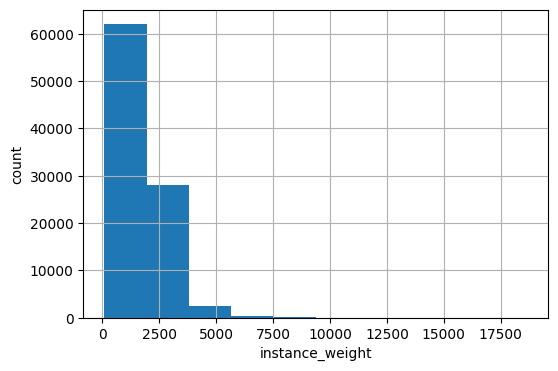

In [ ]:
dataset['instance_weight'].hist(figsize=(6,4))
plt.xlabel('instance_weight')
plt.ylabel('count')

- instance weight is left skewed

In [ ]:
dis_fea.append('instance_weight')

#### num_persons_worked_for_employer distribution

Text(0, 0.5, 'count')

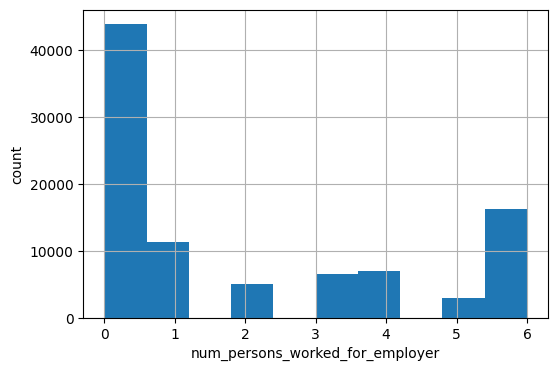

In [ ]:
dataset['num_persons_worked_for_employer'].hist(figsize=(6,4))
plt.xlabel('num_persons_worked_for_employer')
plt.ylabel('count')

- num_persons_worked_for_employer is not that important feature. From dataset.describe() we can see 50 % people num_persons_worked_for_employer is only 1 so we cannot see any variation for num_persons_worked_for_employer so not important feature

#### own_business_or_self_employed distribution

Text(0, 0.5, 'count')

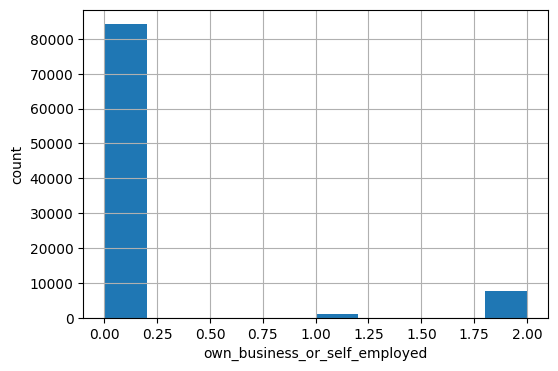

In [ ]:
dataset['own_business_or_self_employed'].hist(figsize=(6,4))
plt.xlabel('own_business_or_self_employed')
plt.ylabel('count')

we can se that only(0-0.25) people are highly have own_business_or_self_employed.from dataset.describe() 75% of the own_business_or_self_employed column have value 0 so it is not an importnat feature

#### veterans_benefits distribution

Text(0, 0.5, 'count')

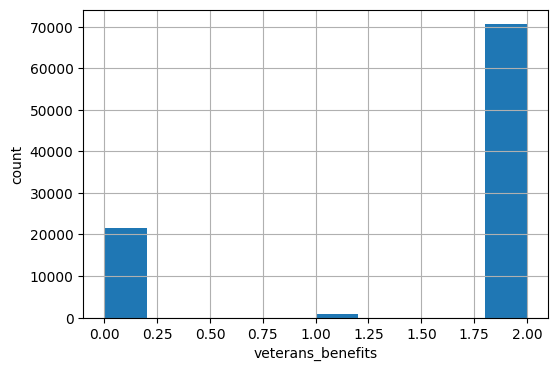

In [ ]:
dataset['veterans_benefits'].hist(figsize=(6,4))
plt.xlabel('veterans_benefits')
plt.ylabel('count')

- we can se that only(1.75-2) veternas_benefit  are highly have 70000 count .from dataset.describe() 75% of the veternas_benefit column have value 2 so it is not an importnat feature and there is not much variation

#### weeks_worked_in_year distribution

Text(0, 0.5, 'count')

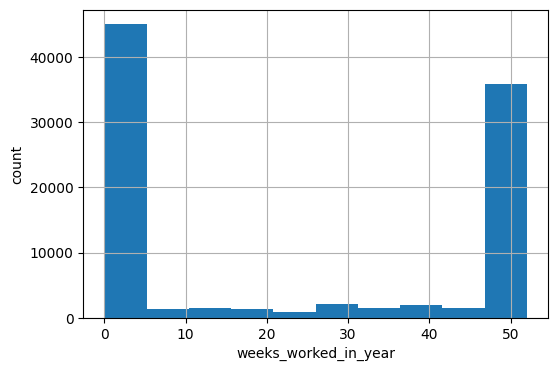

In [ ]:
dataset['weeks_worked_in_year'].hist(figsize=(6,4))
plt.xlabel('weeks_worked_in_year')
plt.ylabel('count')

- weeks_worked_in_year is not evenly distributed and from datset.describe() we can see 50% of weeks_worked_in_year have value 0 so it is not an important feature.

### year distribution

Text(0, 0.5, 'count')

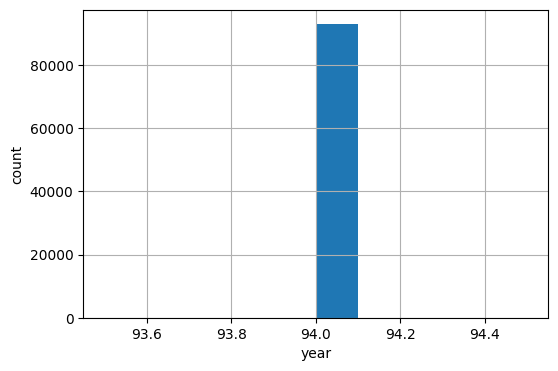

In [ ]:
dataset['year'].hist(figsize=(6,4))
plt.xlabel('year')
plt.ylabel('count')

- year is not also a important feature as this feature is concentrated only on year == 94.so for different attribute we are geeting only year==94 so there is not much variation.

In [ ]:
dis_fea

['age', 'instance_weight', 'industry_code', 'occupation_code']

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

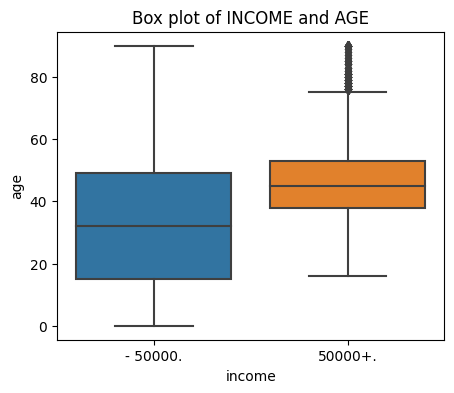

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='age',data=dataset).set_title('Box plot of INCOME and AGE')

Text(0.5, 1.0, 'Box plot of INCOME and instance_weight')

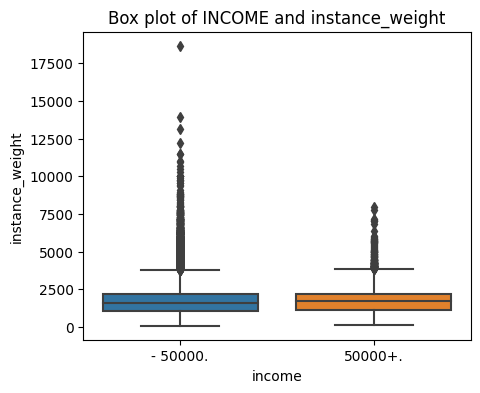

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='instance_weight',data=dataset).set_title('Box plot of INCOME and instance_weight')

Text(0.5, 1.0, 'Box plot of INCOME and industry_code')

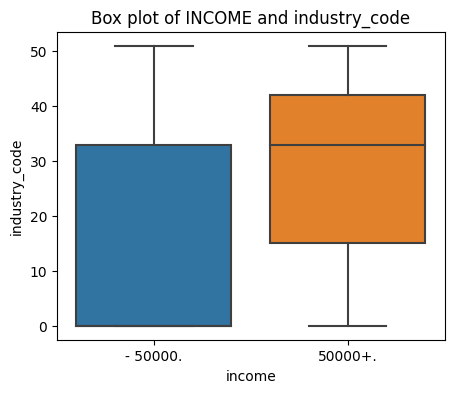

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='industry_code',data=dataset).set_title('Box plot of INCOME and industry_code')

Text(0.5, 1.0, 'Box plot of INCOME and occupation_code')

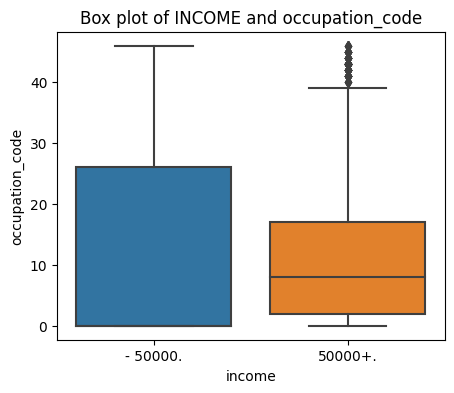

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='occupation_code',data=dataset).set_title('Box plot of INCOME and occupation_code')

### NOMINAL FEATURE DISTRIBUTION

#### class_of_worker

In [ ]:
nom_fea=[]

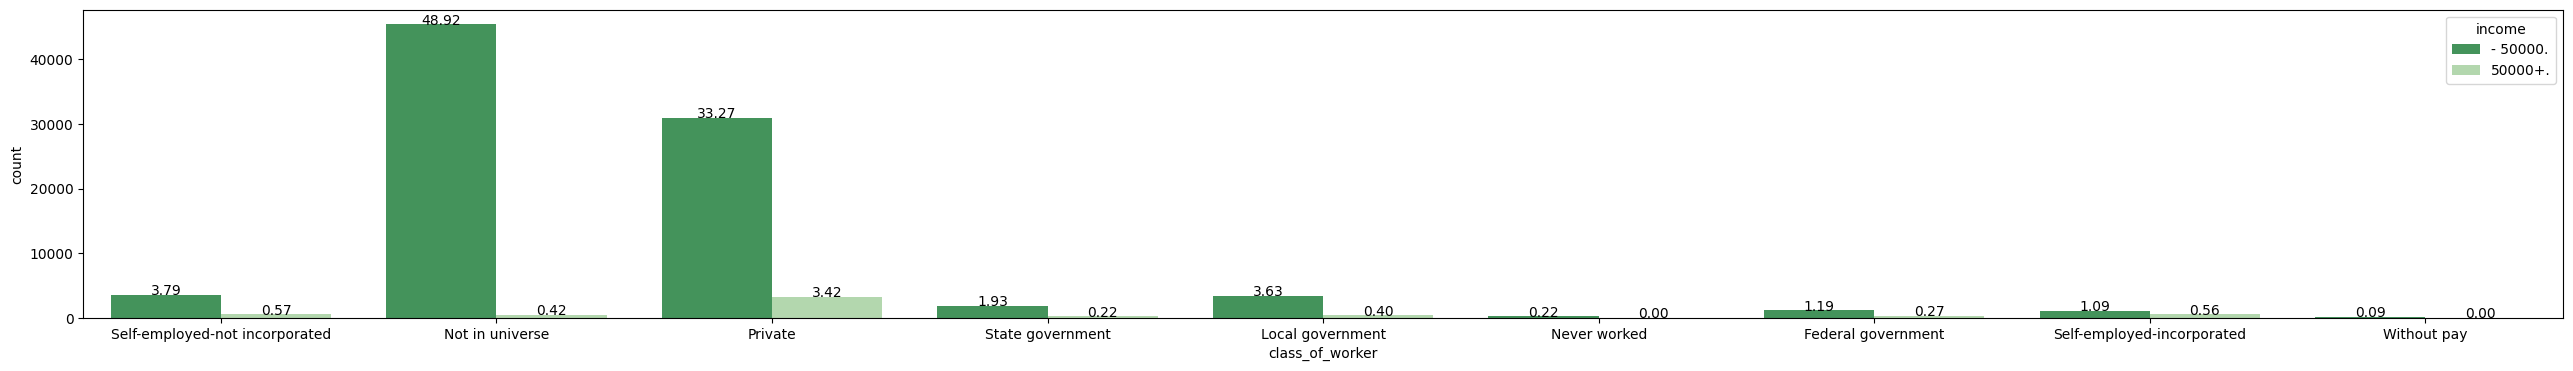

In [ ]:
plt.figure(figsize=(32,4))

total = float(len(dataset['income']))

a = sns.countplot(x='class_of_worker',data=dataset,hue = dataset['income'], palette='Greens_r')

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

- We can see that private sector have most of the income.

In [ ]:
nom_fea.append('class_of_worker')

### education

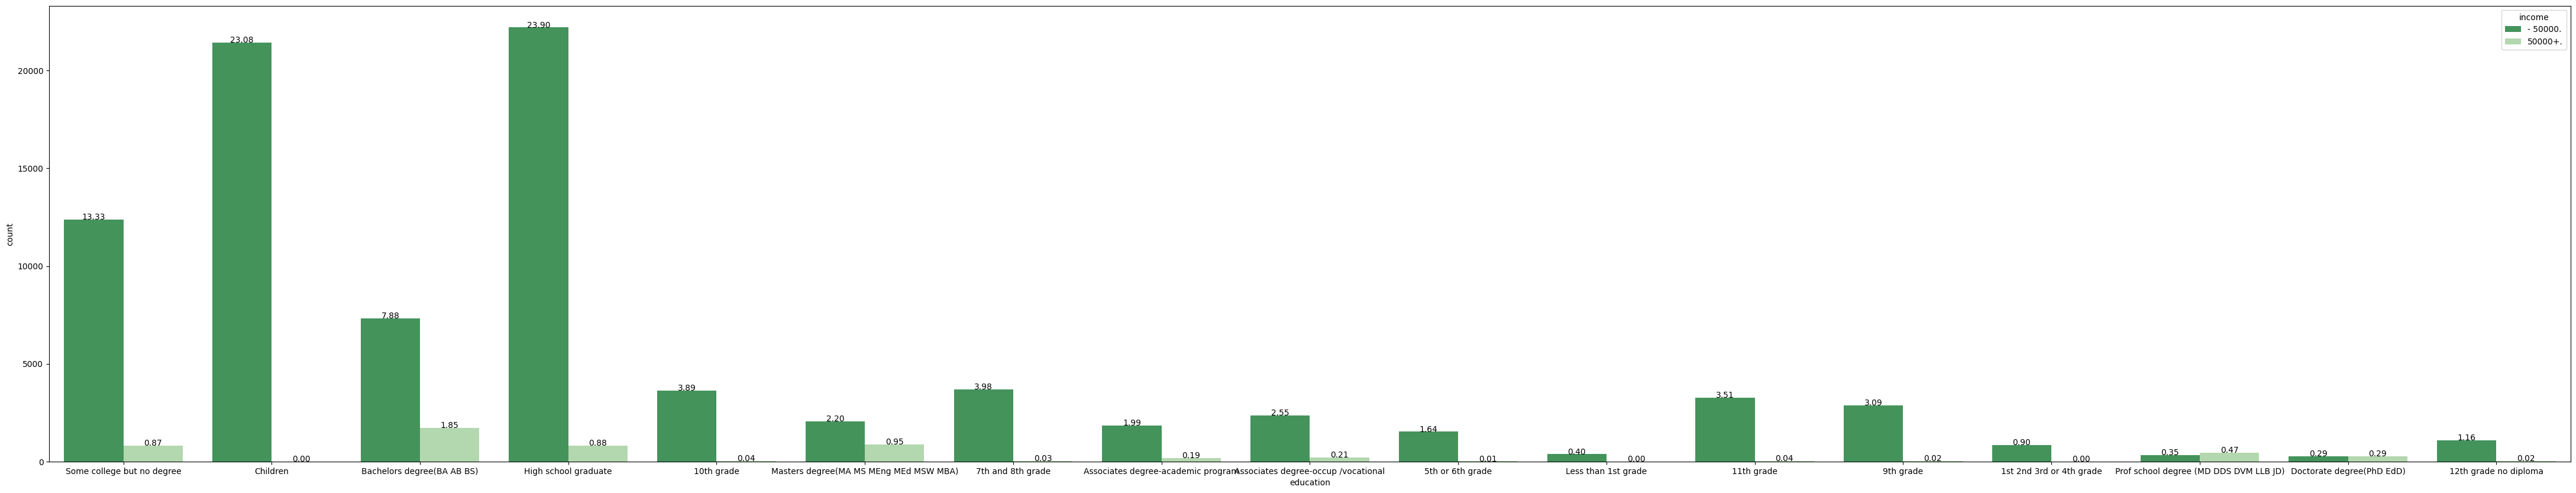

In [ ]:
plt.figure(figsize=(55,10))

a= float(len(['income']))

a= sns.countplot(x='education',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

<Axes: ylabel='education'>

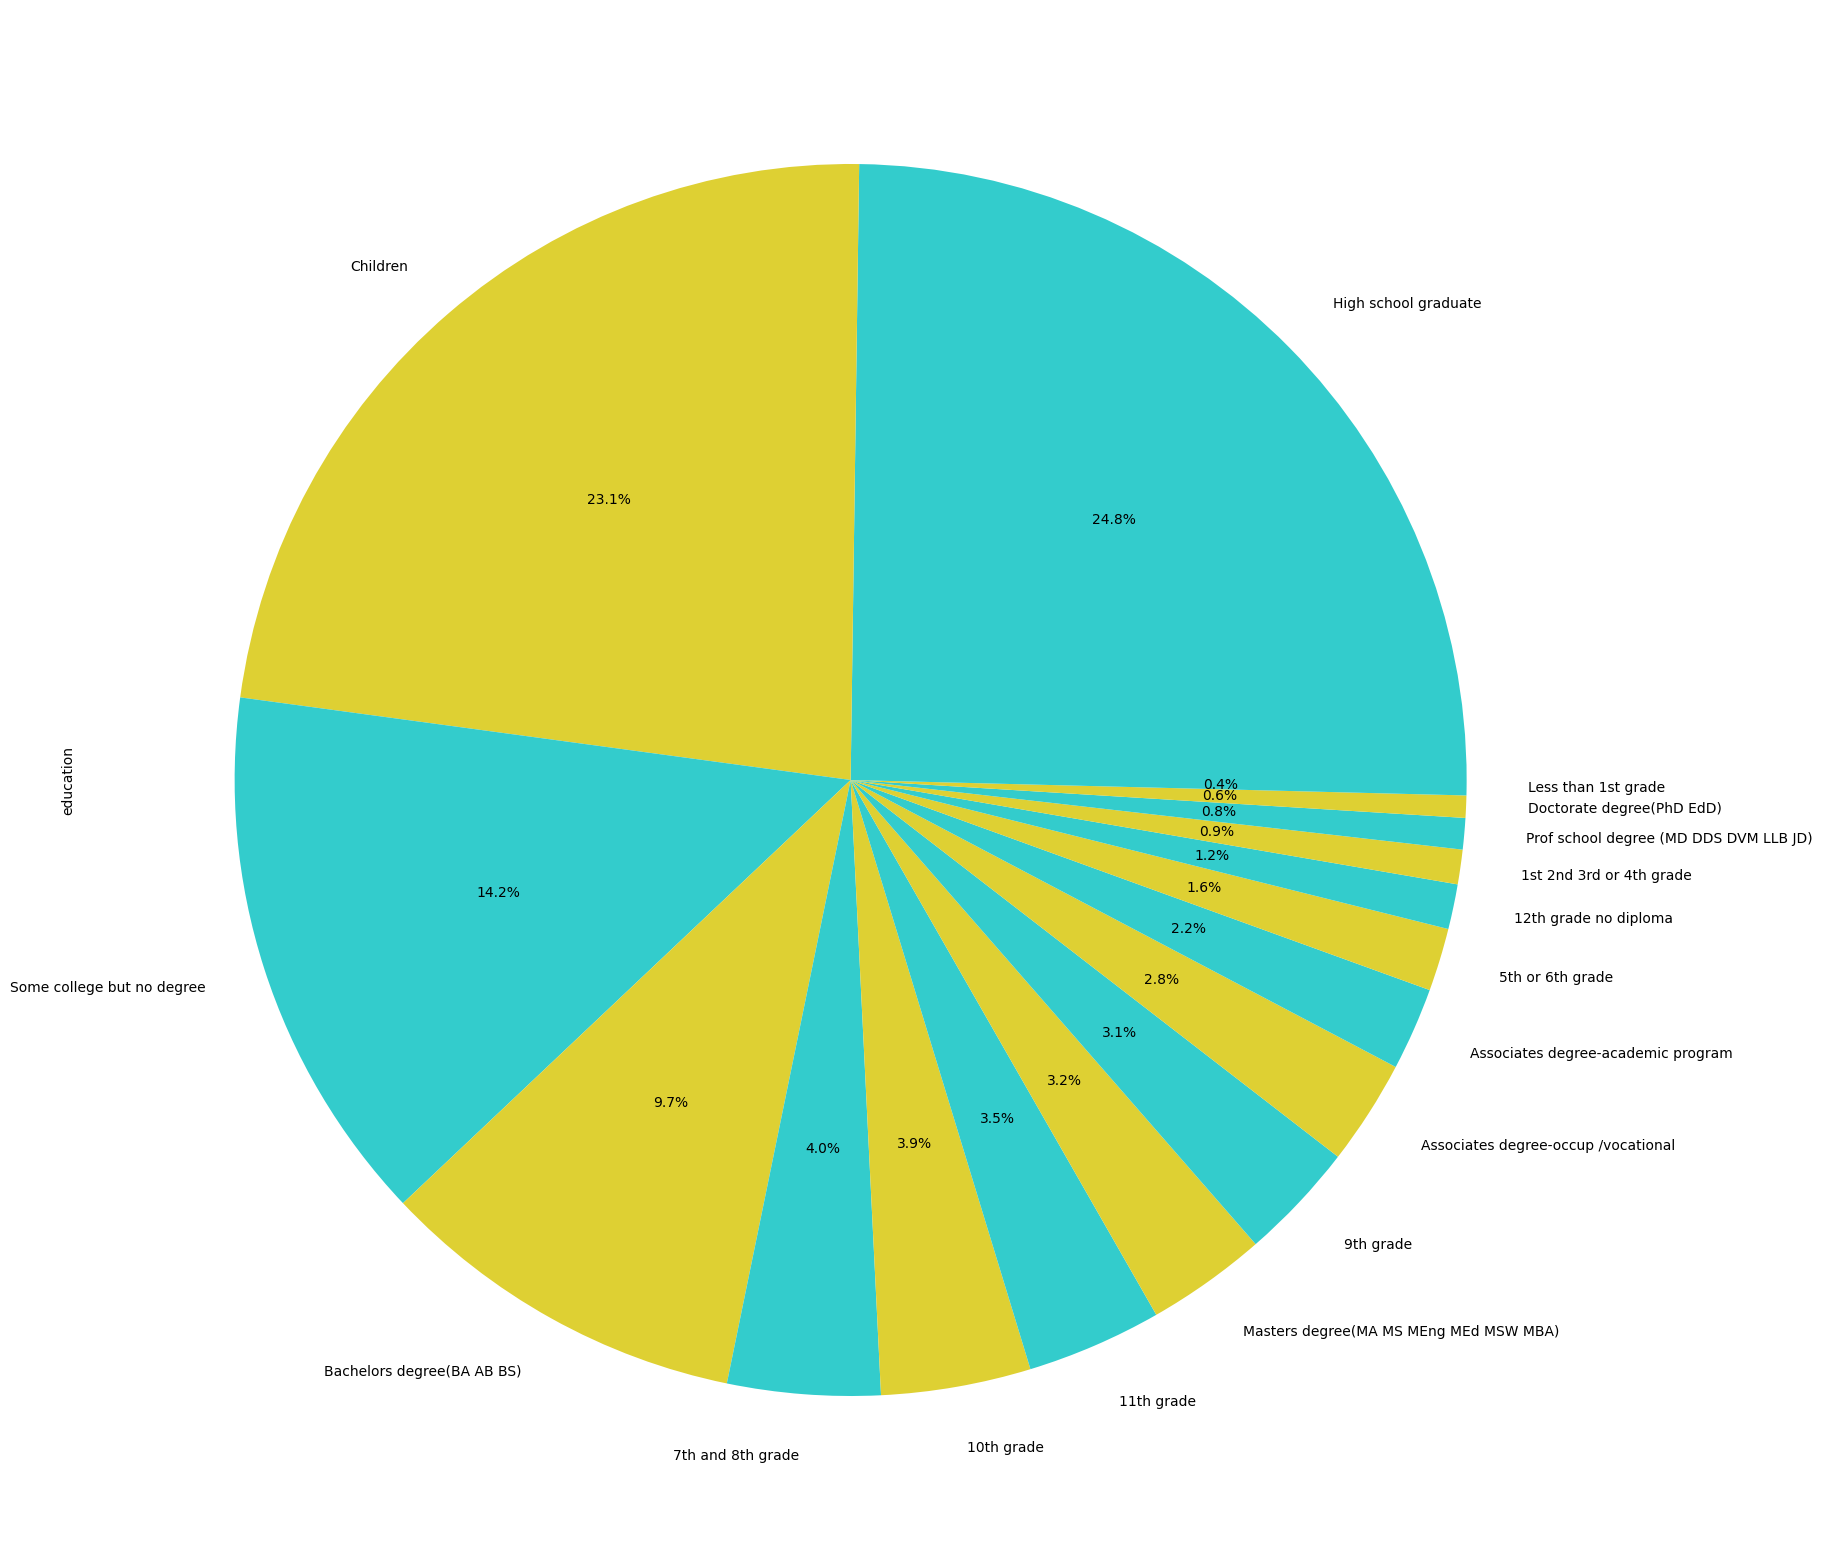

In [ ]:
plt.figure(figsize=(40,20))
dataset['education'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])

HS-grad has highest no of adults and preschool have lowest.

In [ ]:
nom_fea.append('education')

#### enrolled_in_edu_inst_last_wk

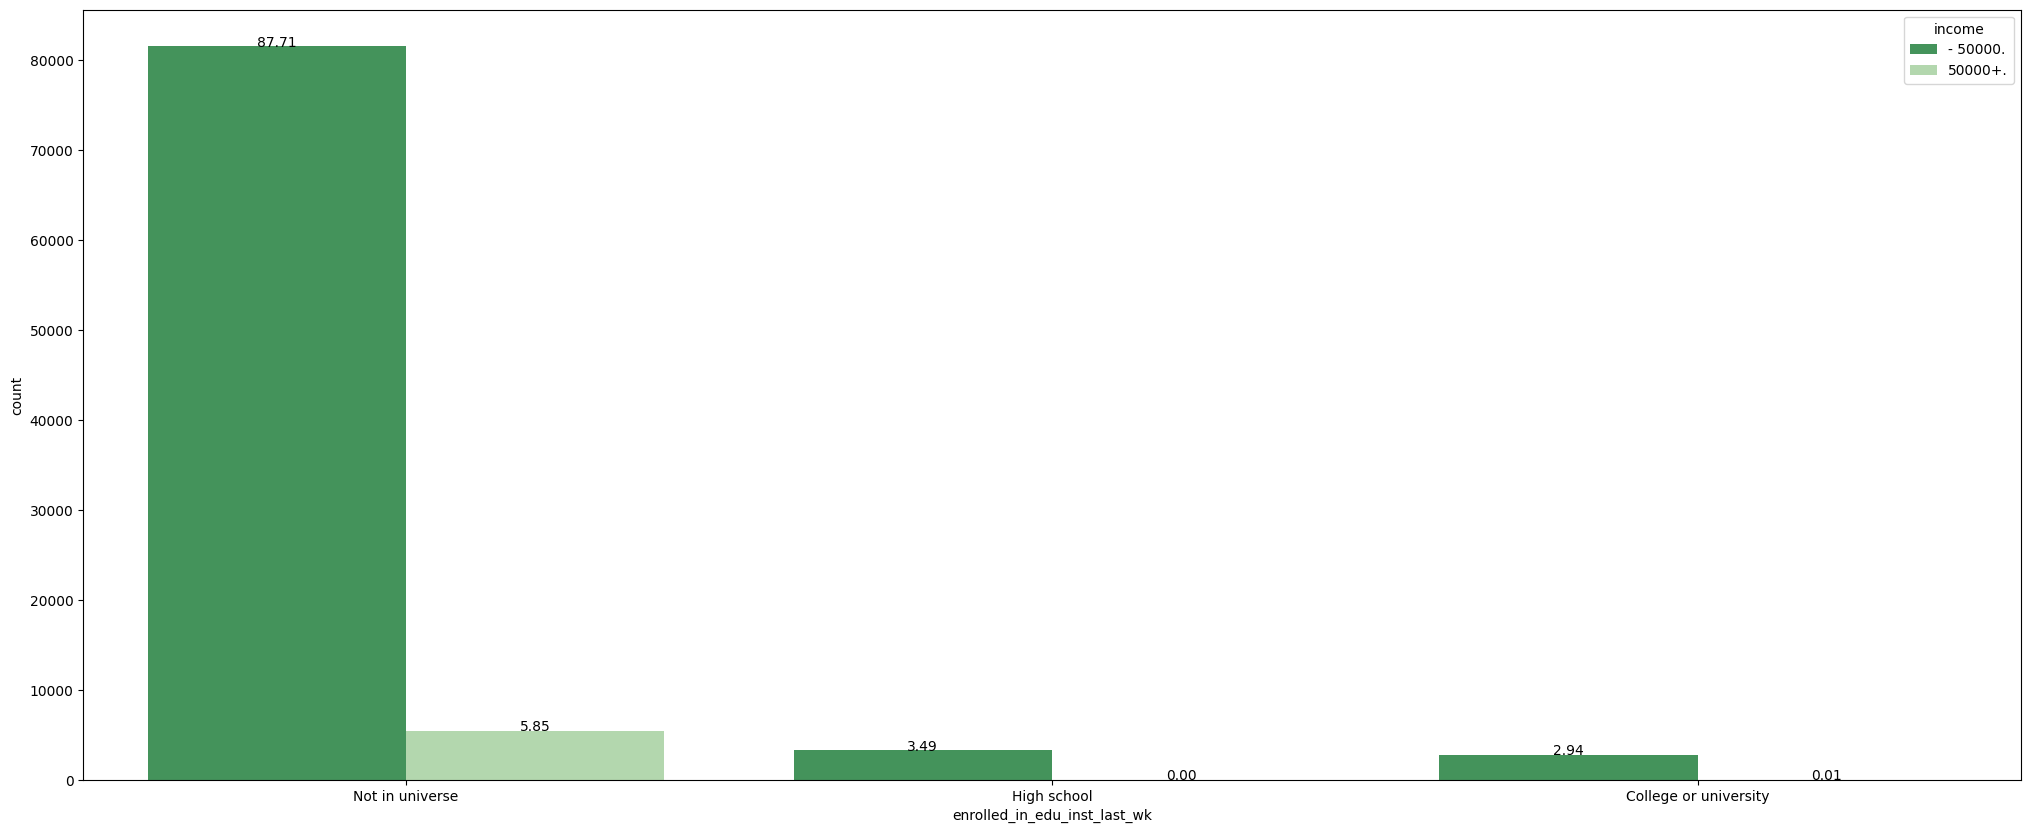

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='enrolled_in_edu_inst_last_wk',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- This is not an important feature as there are more no of people who are not enrolled in any course.so it will not effect the income much

#### marital_status

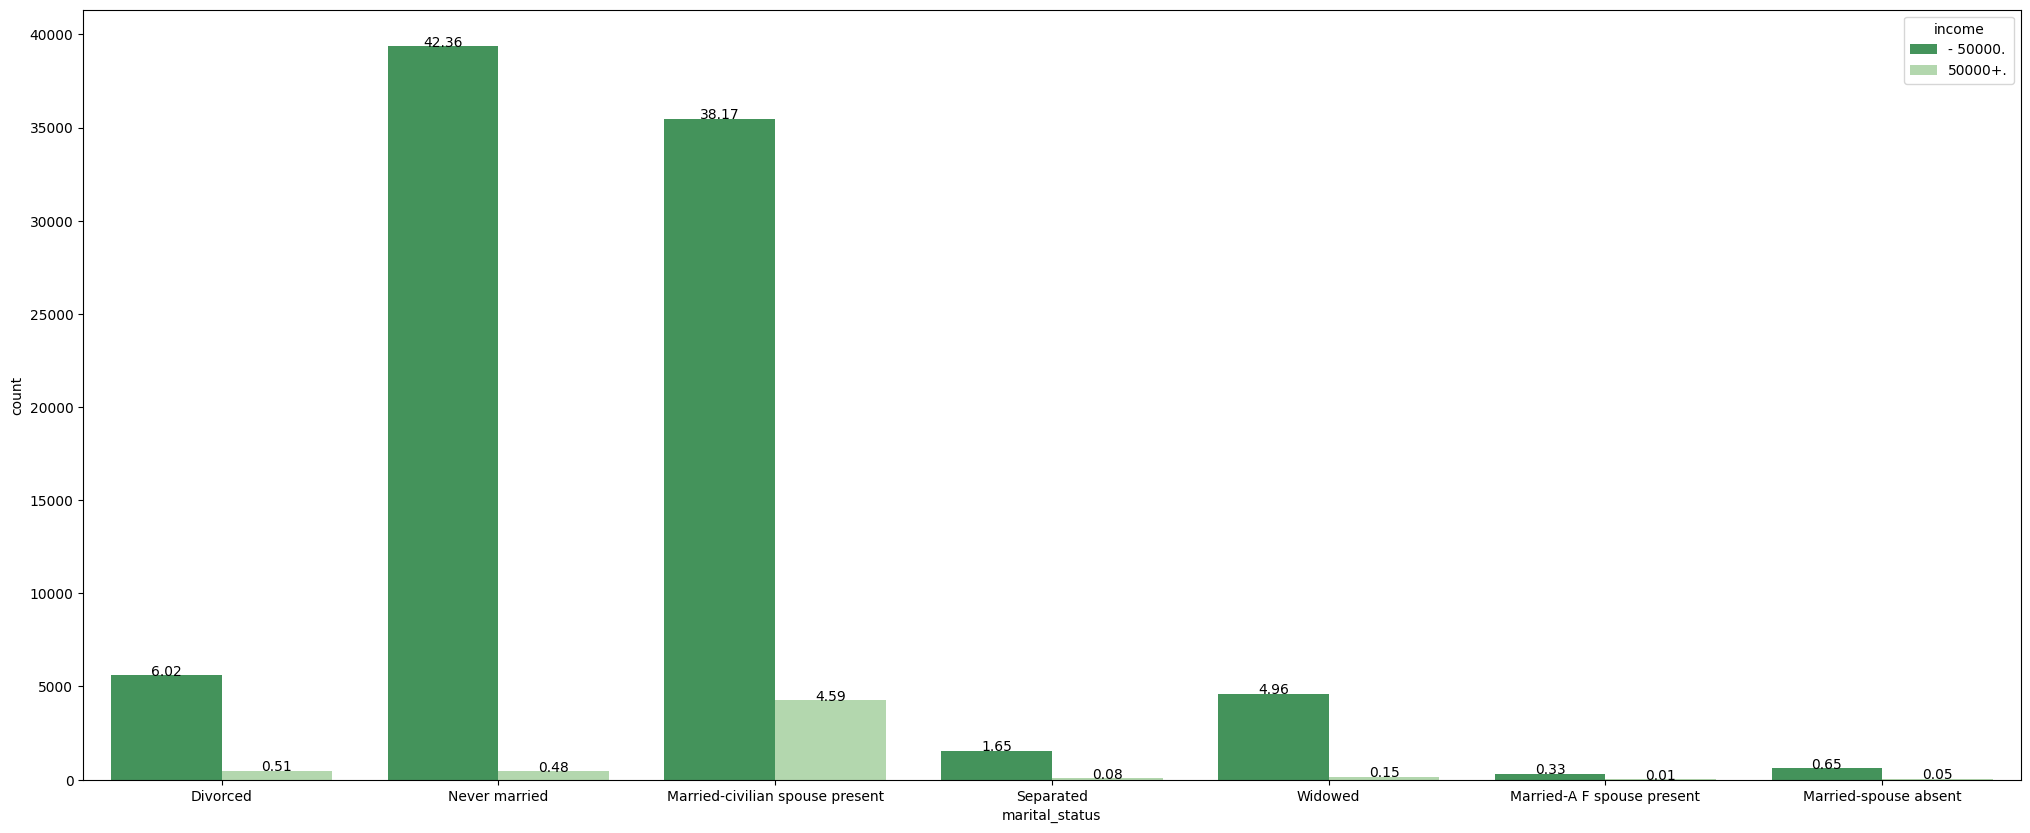

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='marital_status',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- married-civilian spouse present people have more in number

In [ ]:
nom_fea.append('marital_status')

### major_industry_code

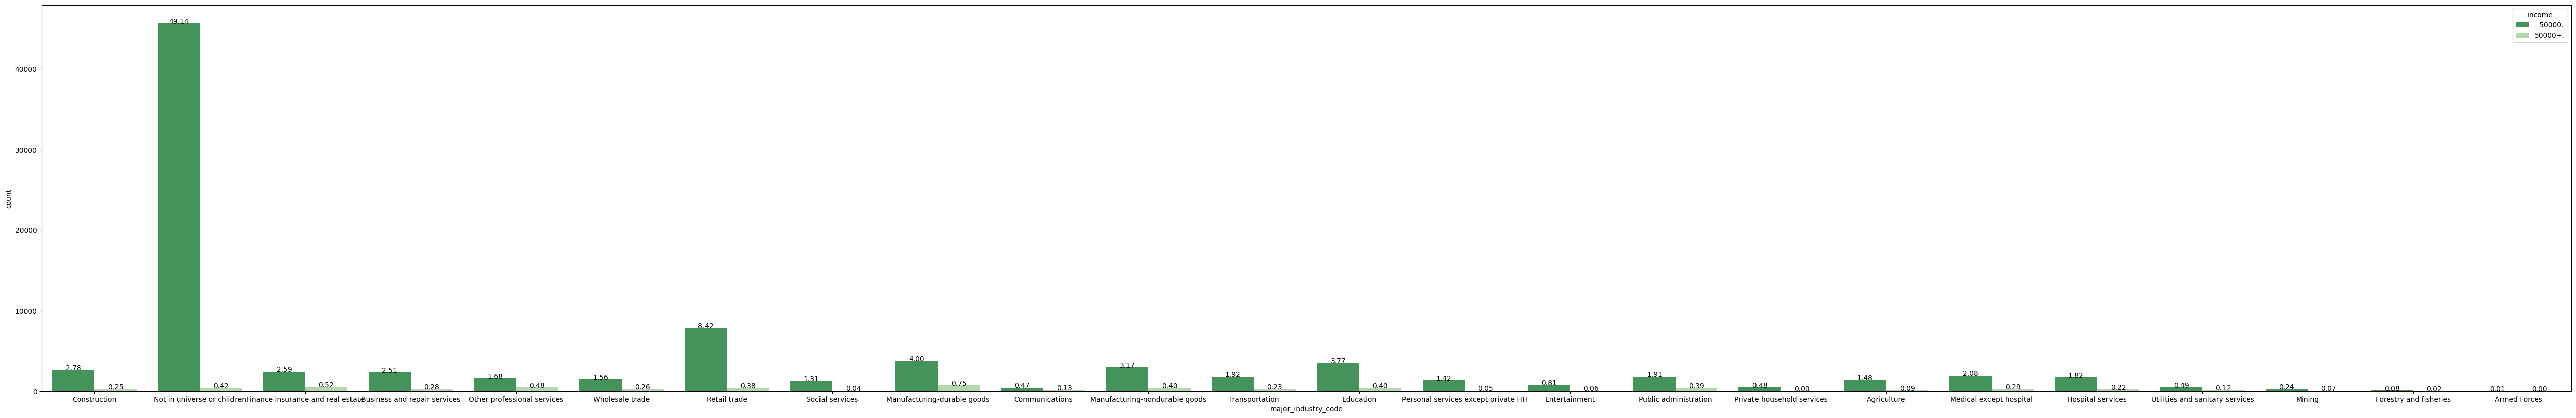

In [ ]:
plt.figure(figsize=(65,10))

a= float(len(['income']))

a= sns.countplot(x='major_industry_code',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- there are almost 50% of the people who have no major_industry_code so we can drop this feature

#### major_occupation_code

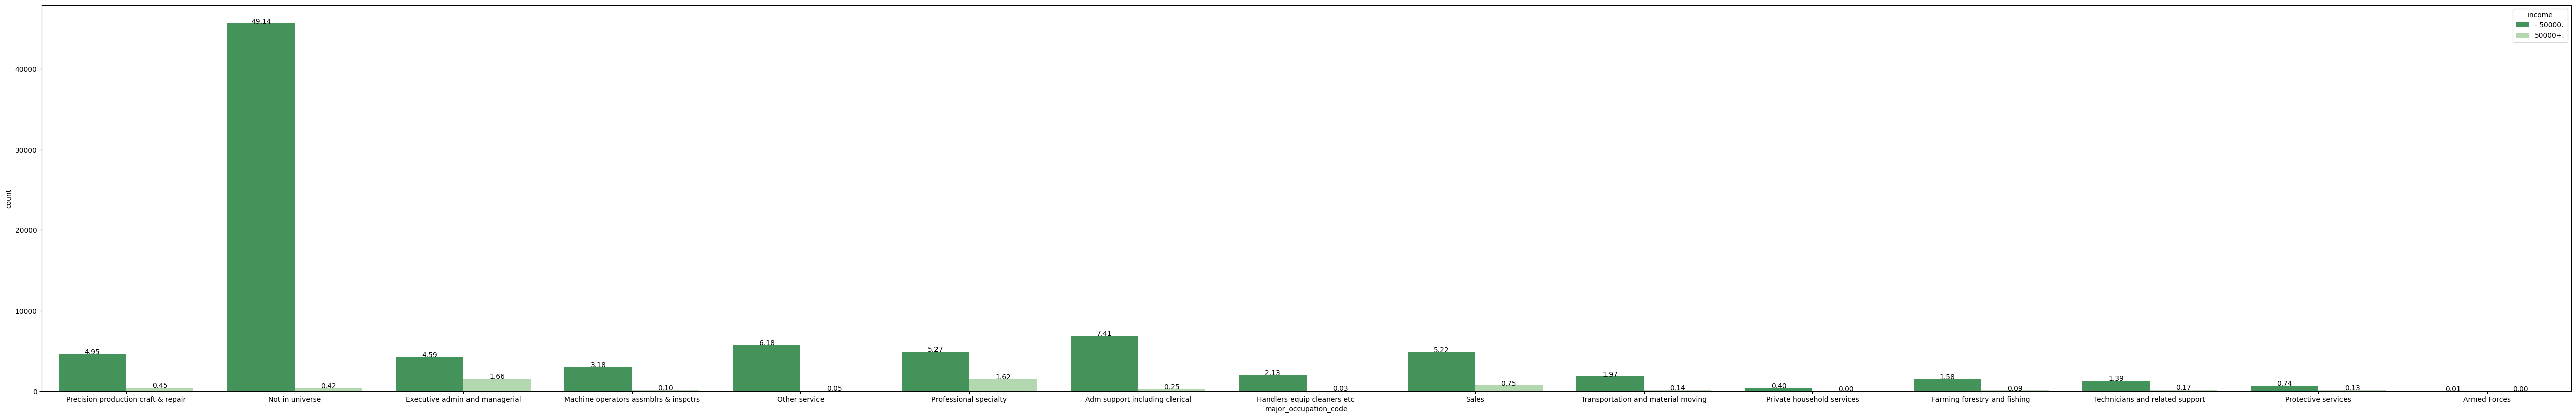

In [ ]:
plt.figure(figsize=(65,10))

a= float(len(['income']))

a= sns.countplot(x='major_occupation_code',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- Almost 50% of the people are not in universe of the major occupation code so we can drop this value

### race

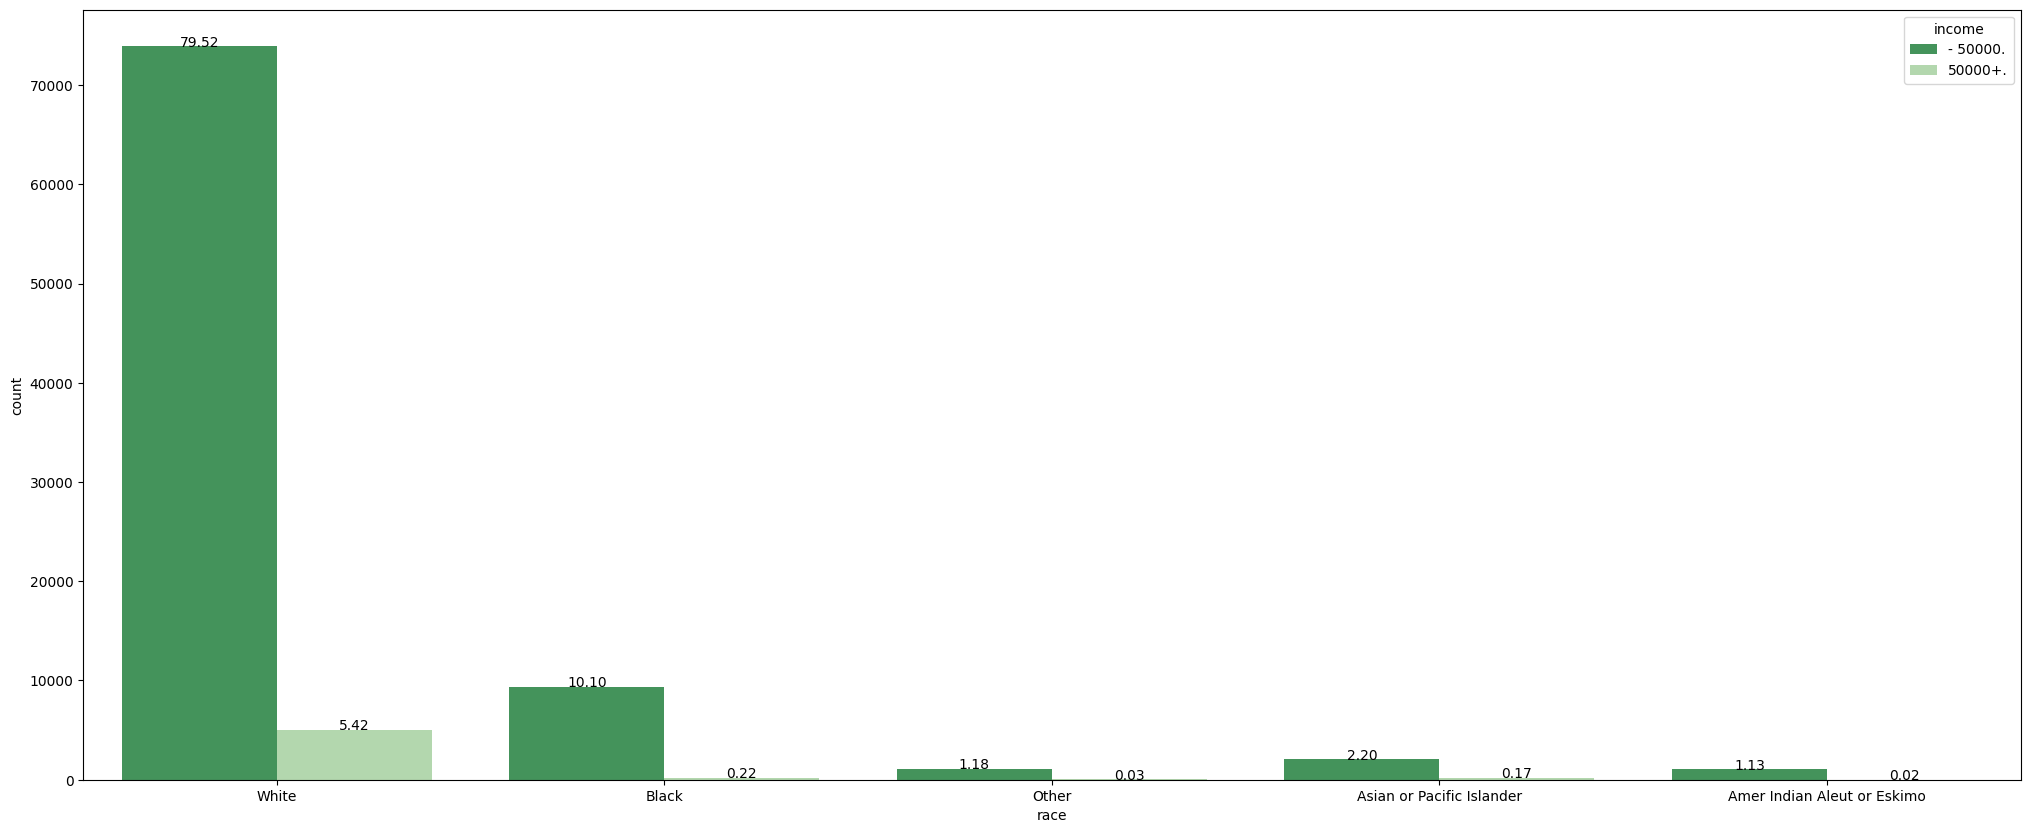

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='race',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- almost 84% of the people are white.

In [ ]:
nom_fea.append('race')

##### hispanic_Origin

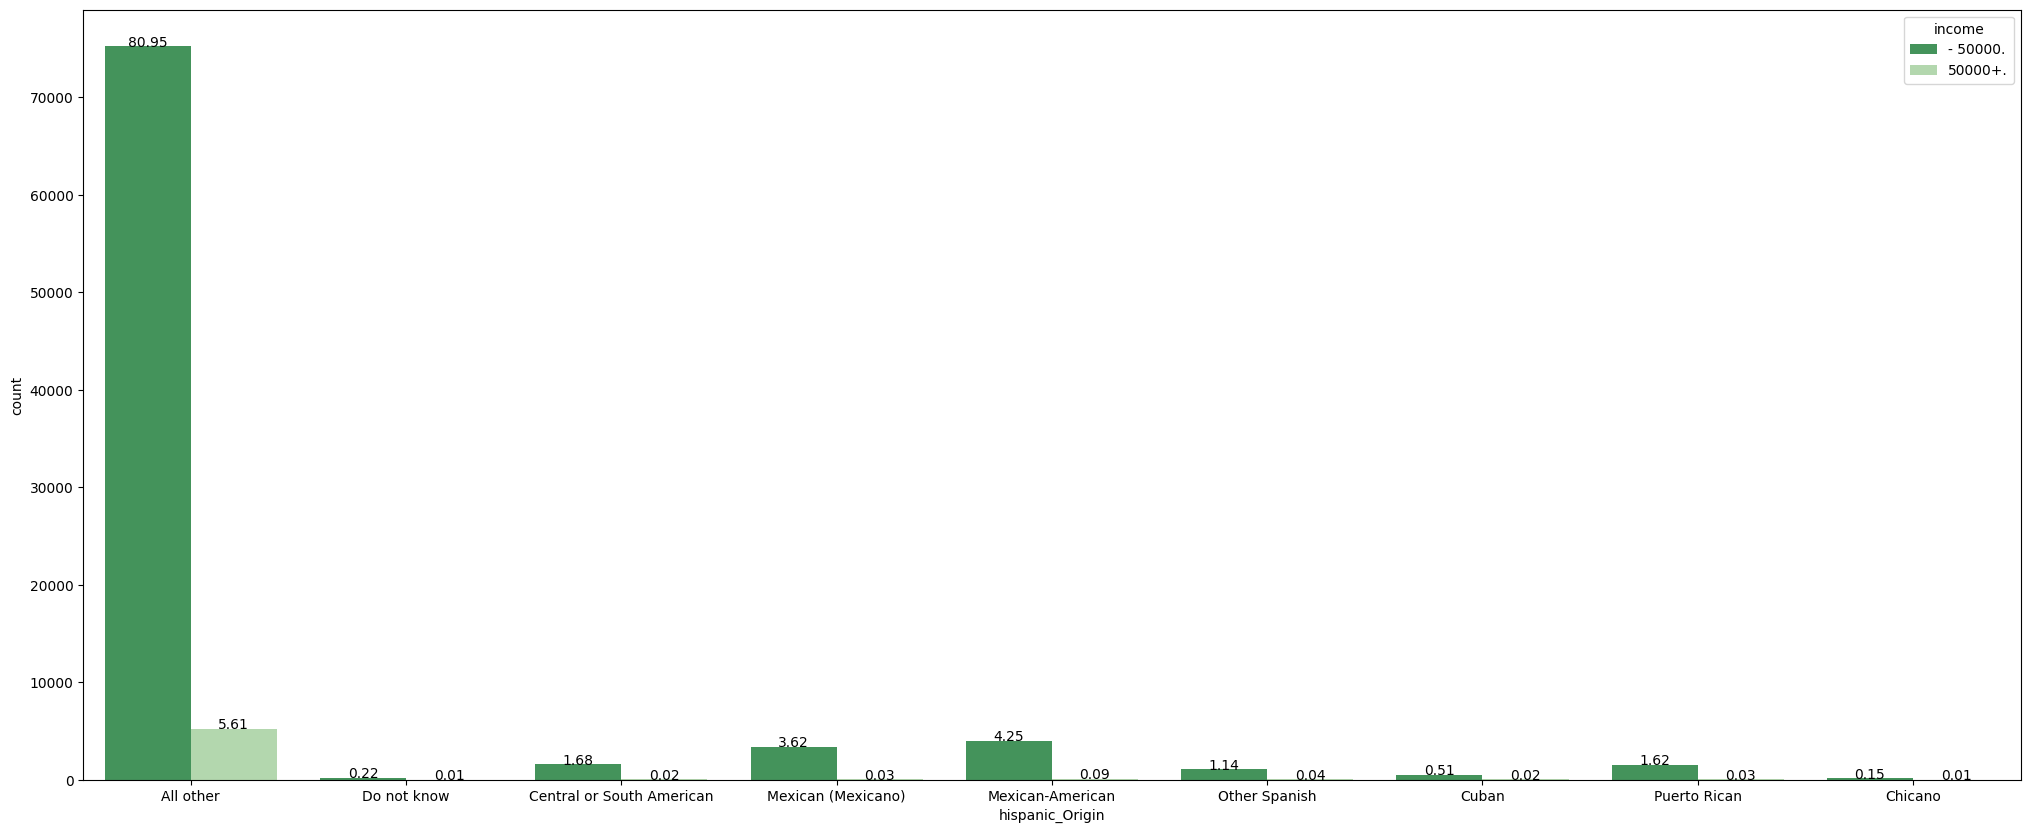

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='hispanic_Origin',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that there are really less count of the people from the hispanic region and there are more people from all other region(86%) than hispanic region so we can drop this feature

#### sex

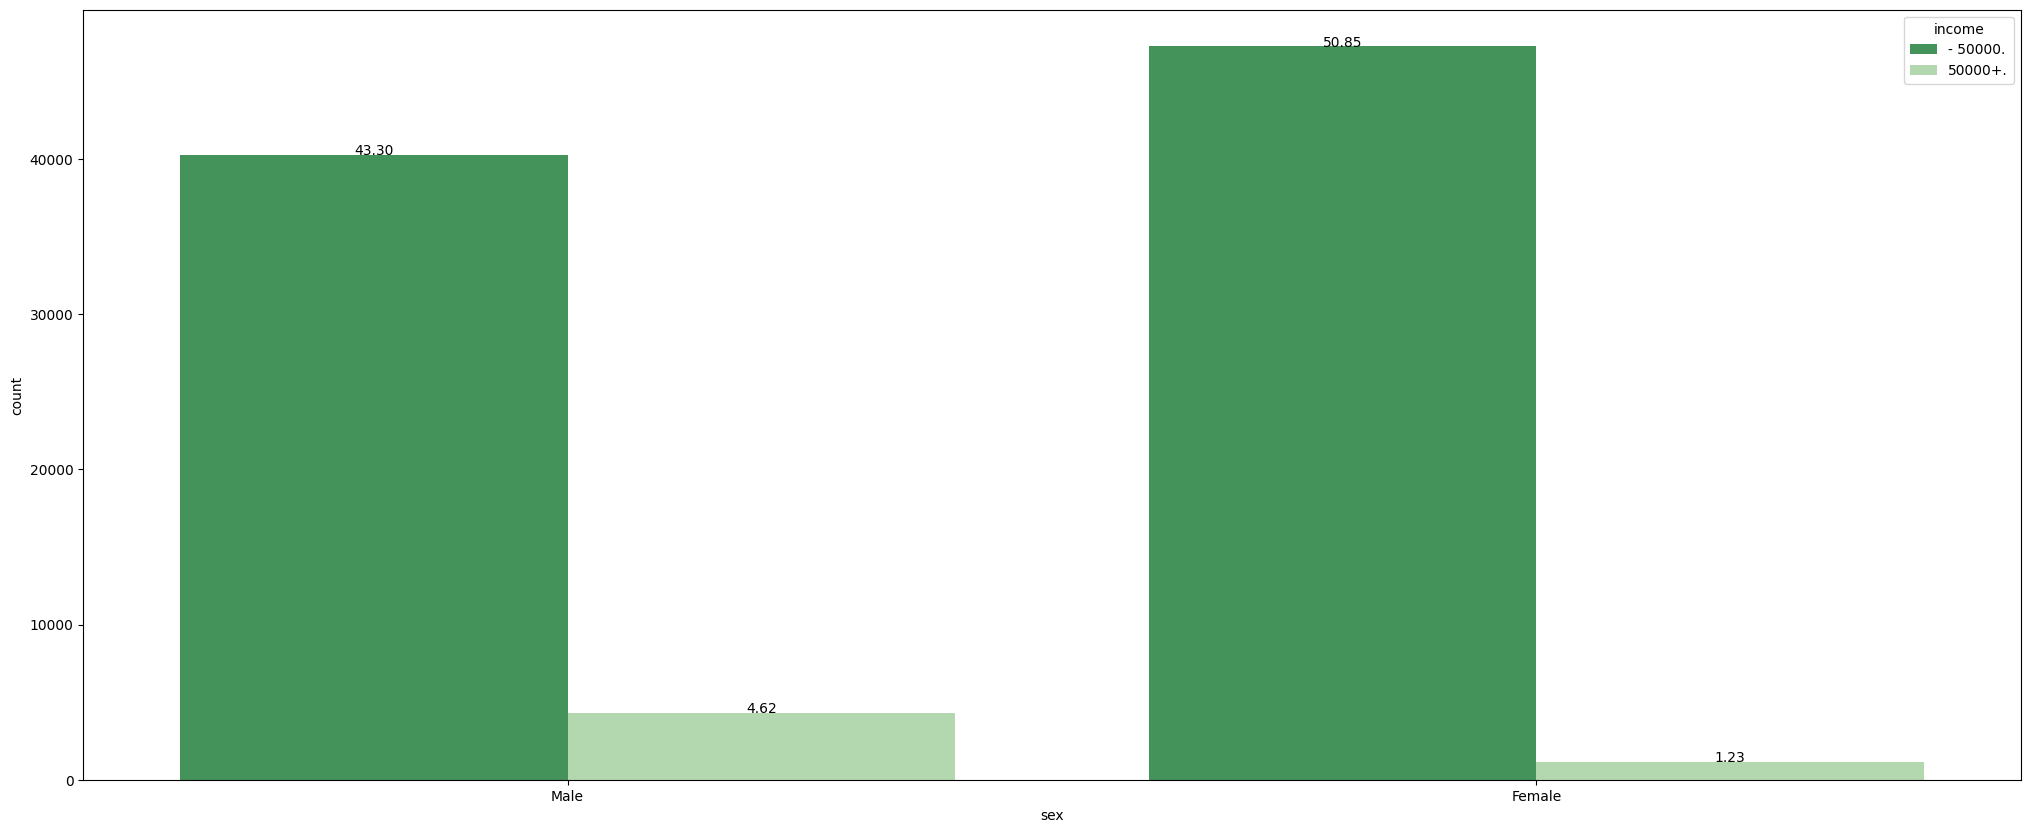

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='sex',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

<Axes: ylabel='sex'>

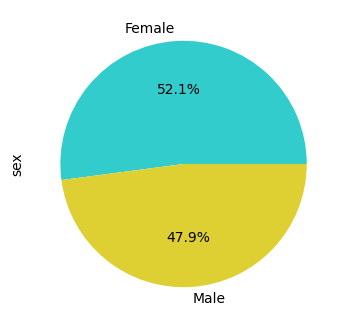

In [ ]:
plt.figure(figsize=(10,4))
dataset['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])

- There are more no of female in the sex feature and male earn more than female.

In [ ]:
nom_fea.append('sex')

#### member_of_a_labor_union

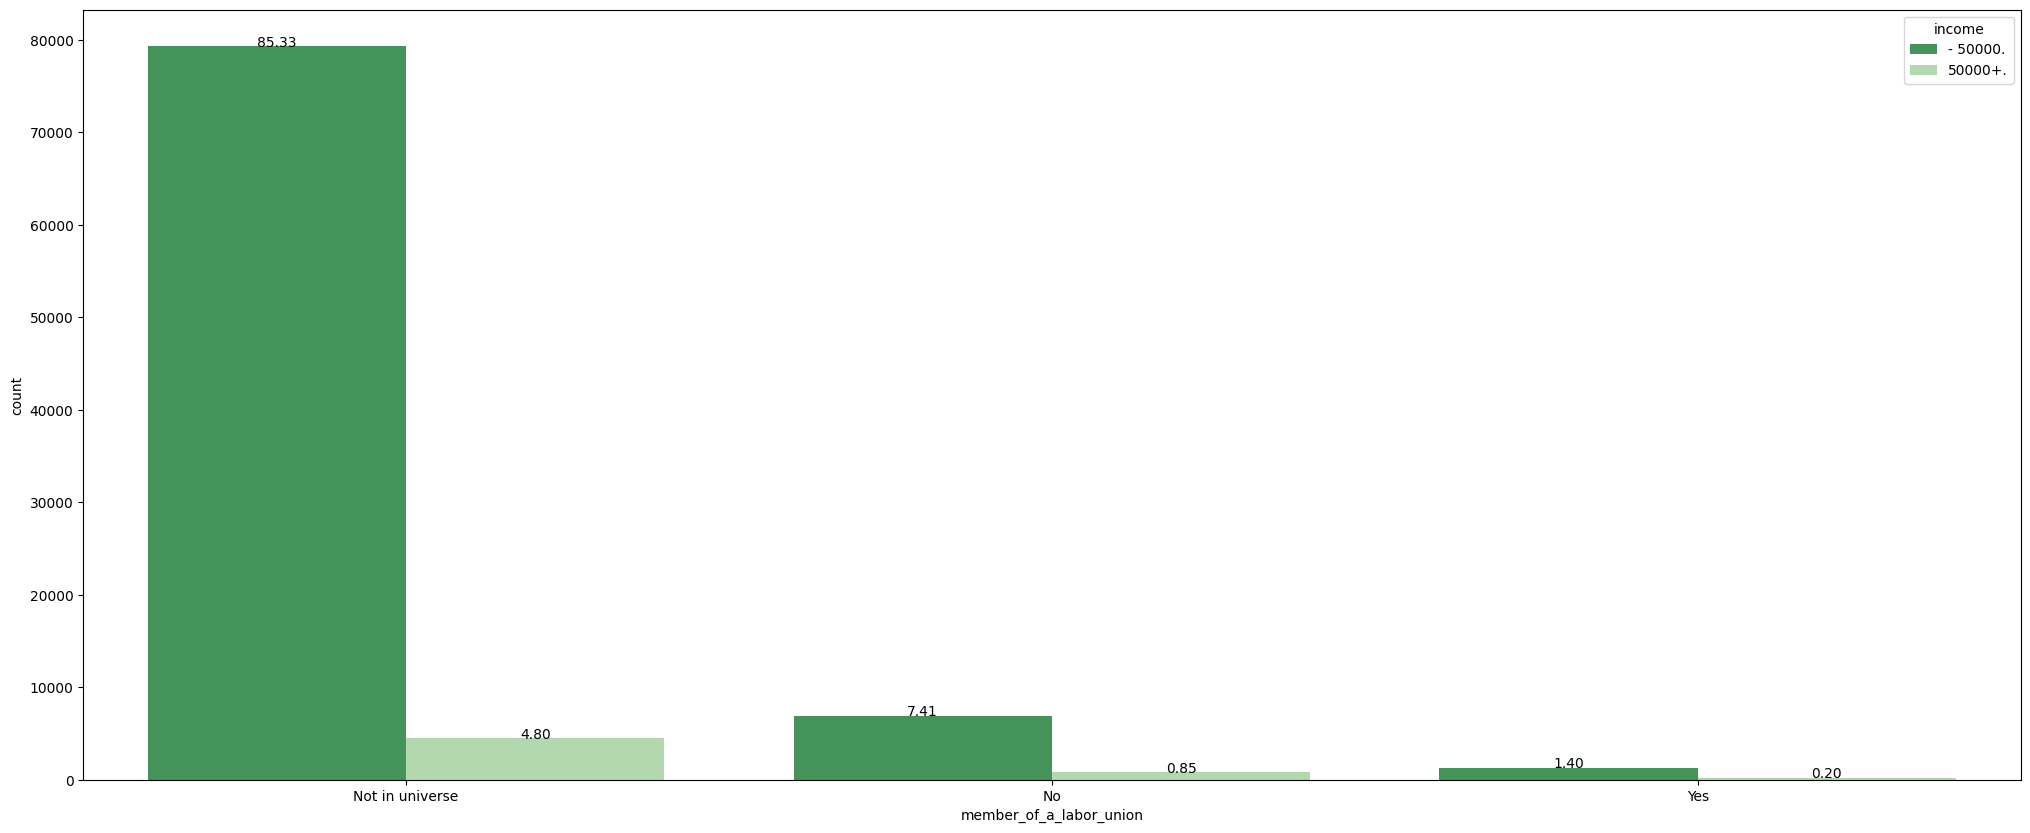

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='member_of_a_labor_union',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- There are more no of people who are not in the universe of the member_of_a_labor_union so we can drop this feature

#### reason_for_unemployment

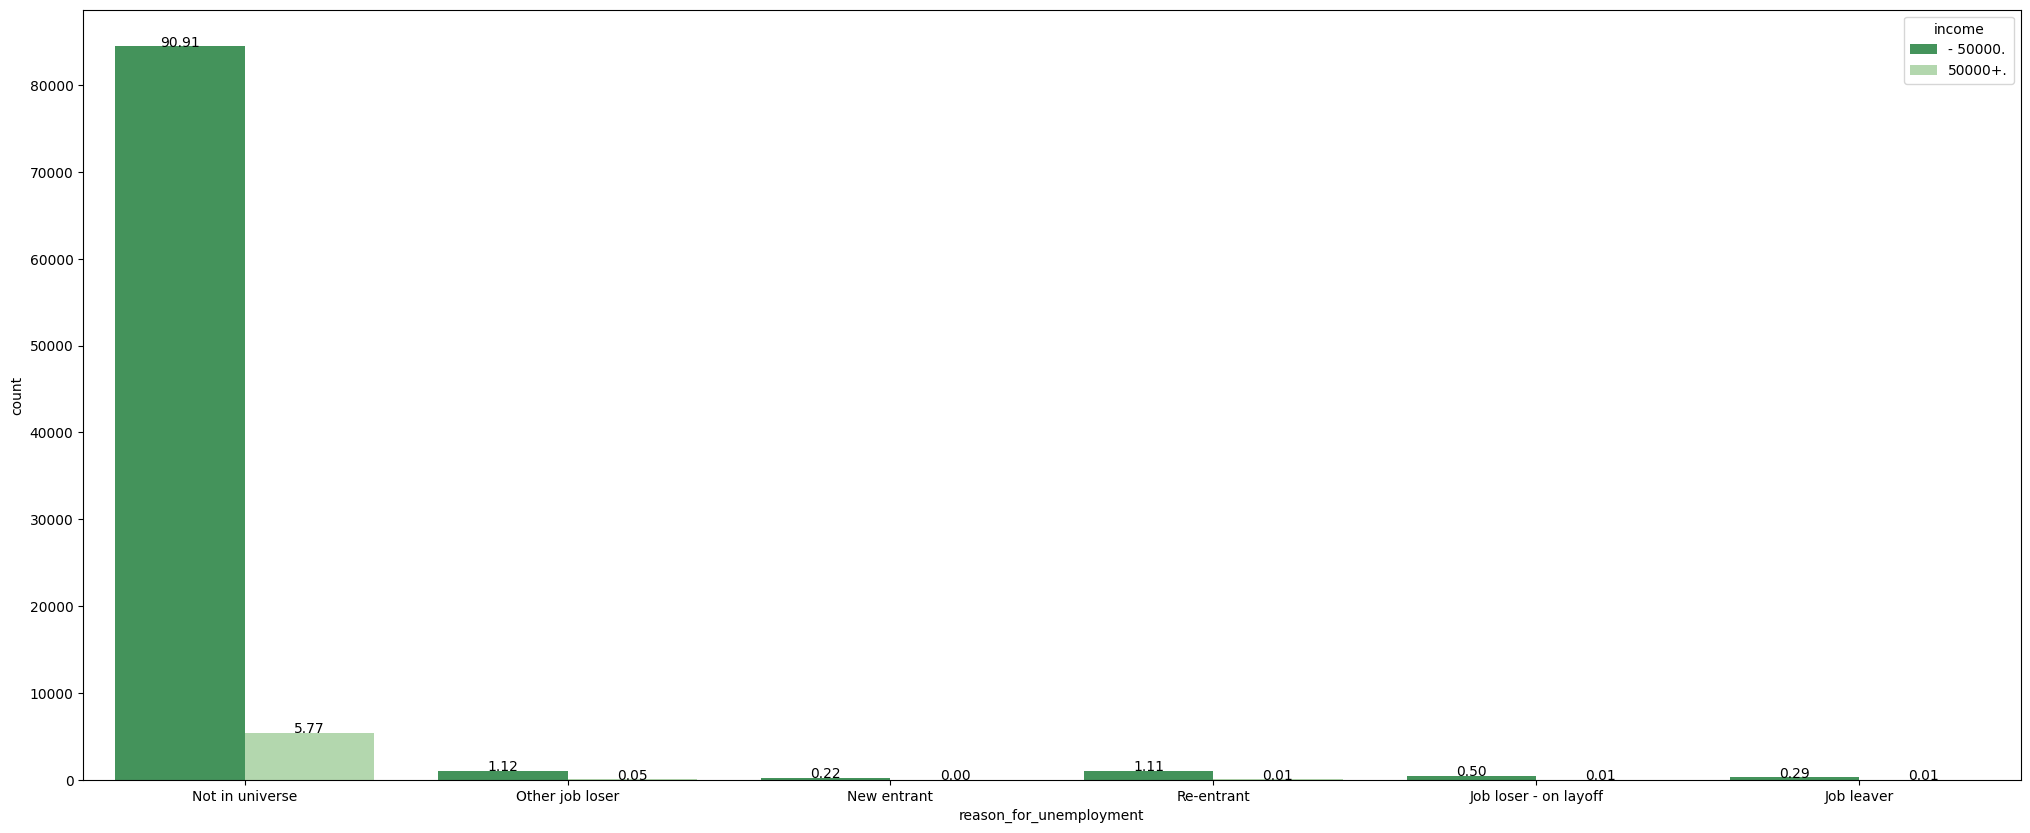

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='reason_for_unemployment',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- There are more no of people who are not in the universe of the reason_for_unemployment so we can drop this feature

#### full_or_part_time_employment_stat

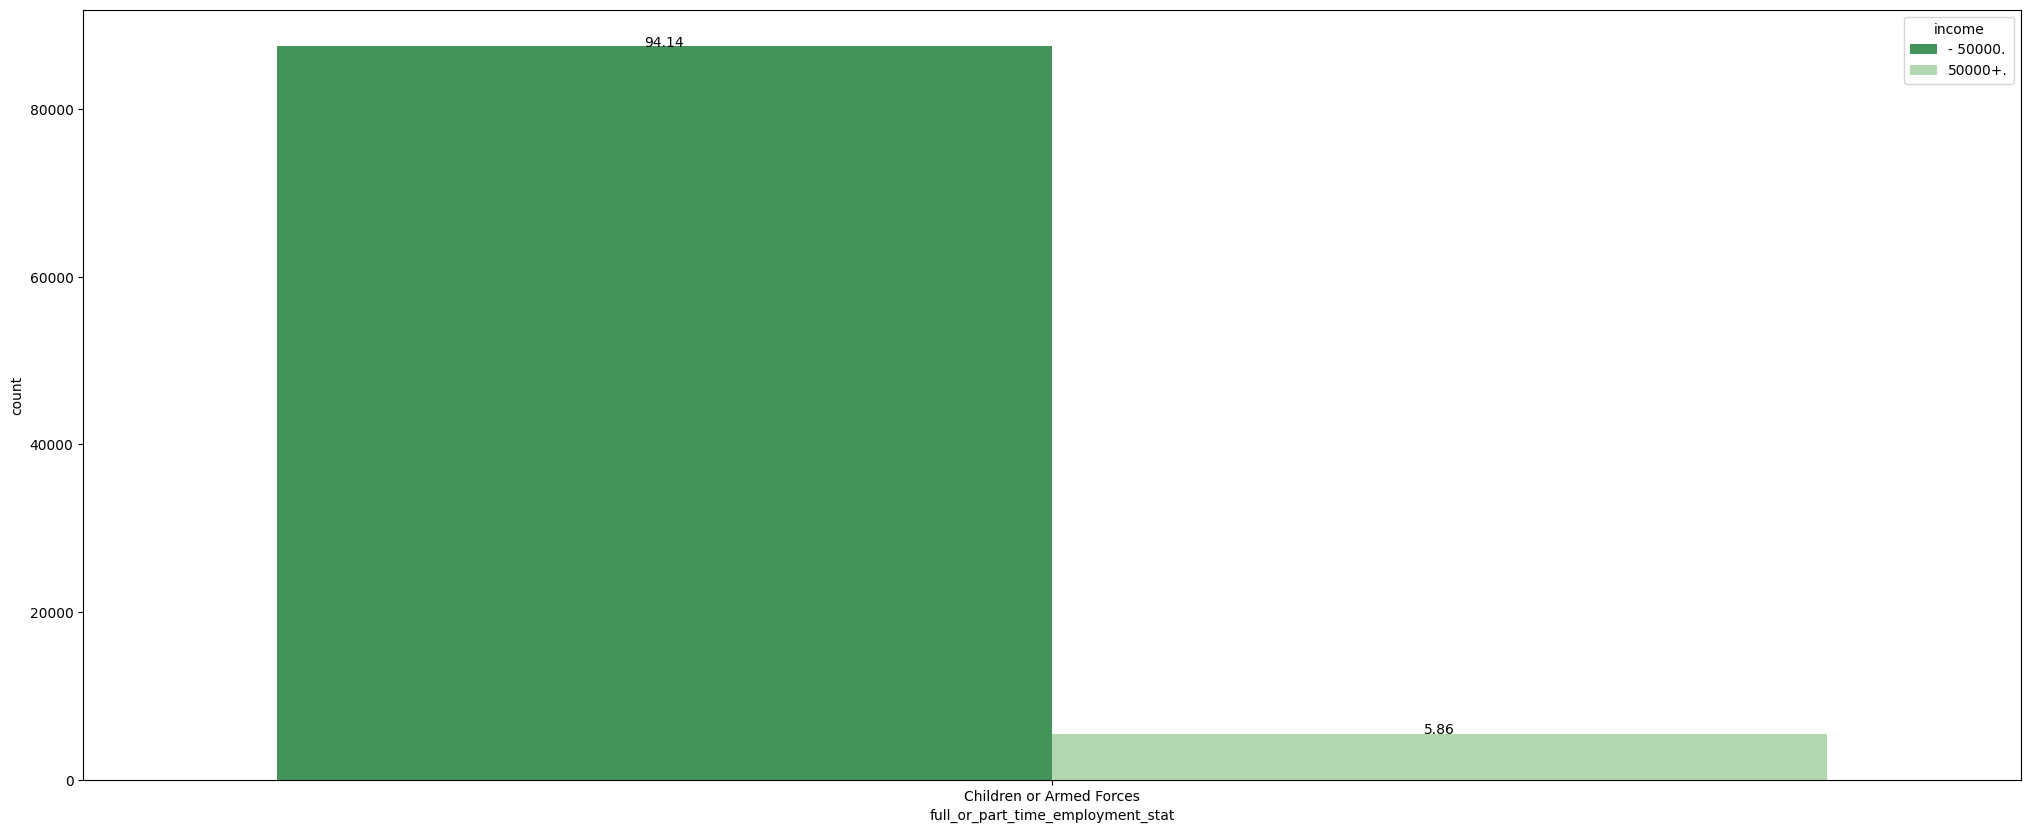

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='full_or_part_time_employment_stat',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- There is only one value for full_or_part_time_employment_stat so we can say that for full_or_part_time_employment_stat there is no variation in the dataset so we can drop this feature

#### tax_filer_status

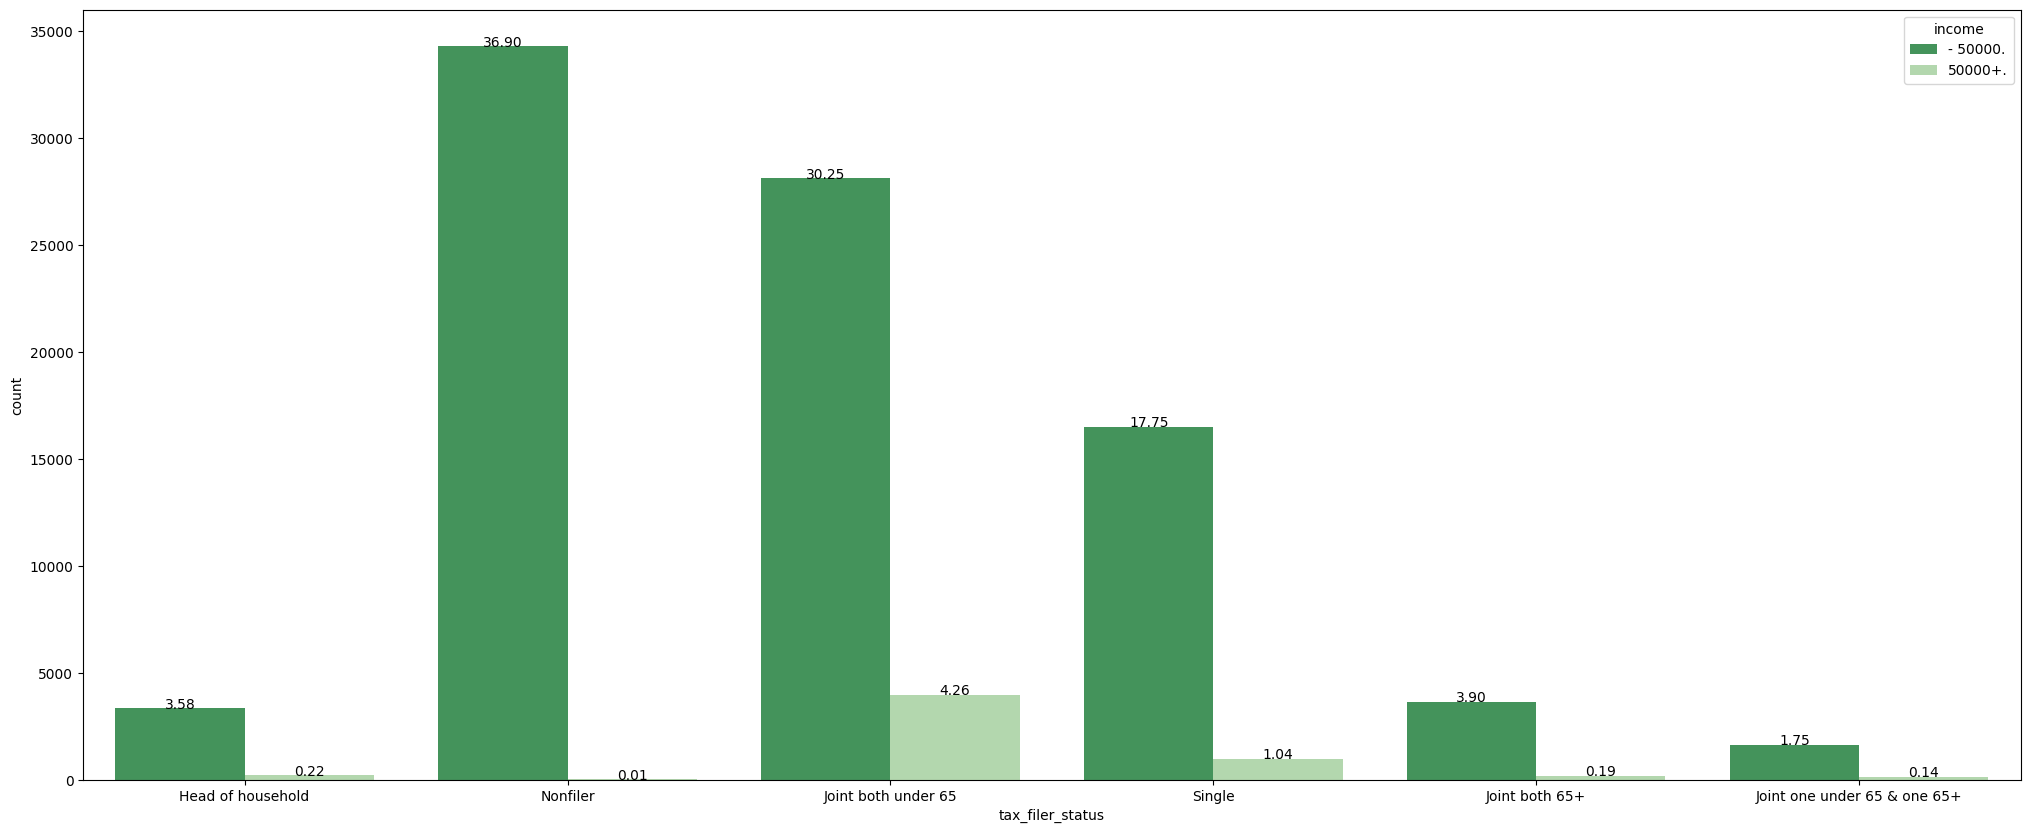

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='tax_filer_status',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that tax_filler_status nonfiller are more in number and they earn less than 50k

In [ ]:
nom_fea.append('tax_filer_status')

#### region_of_previous_residence

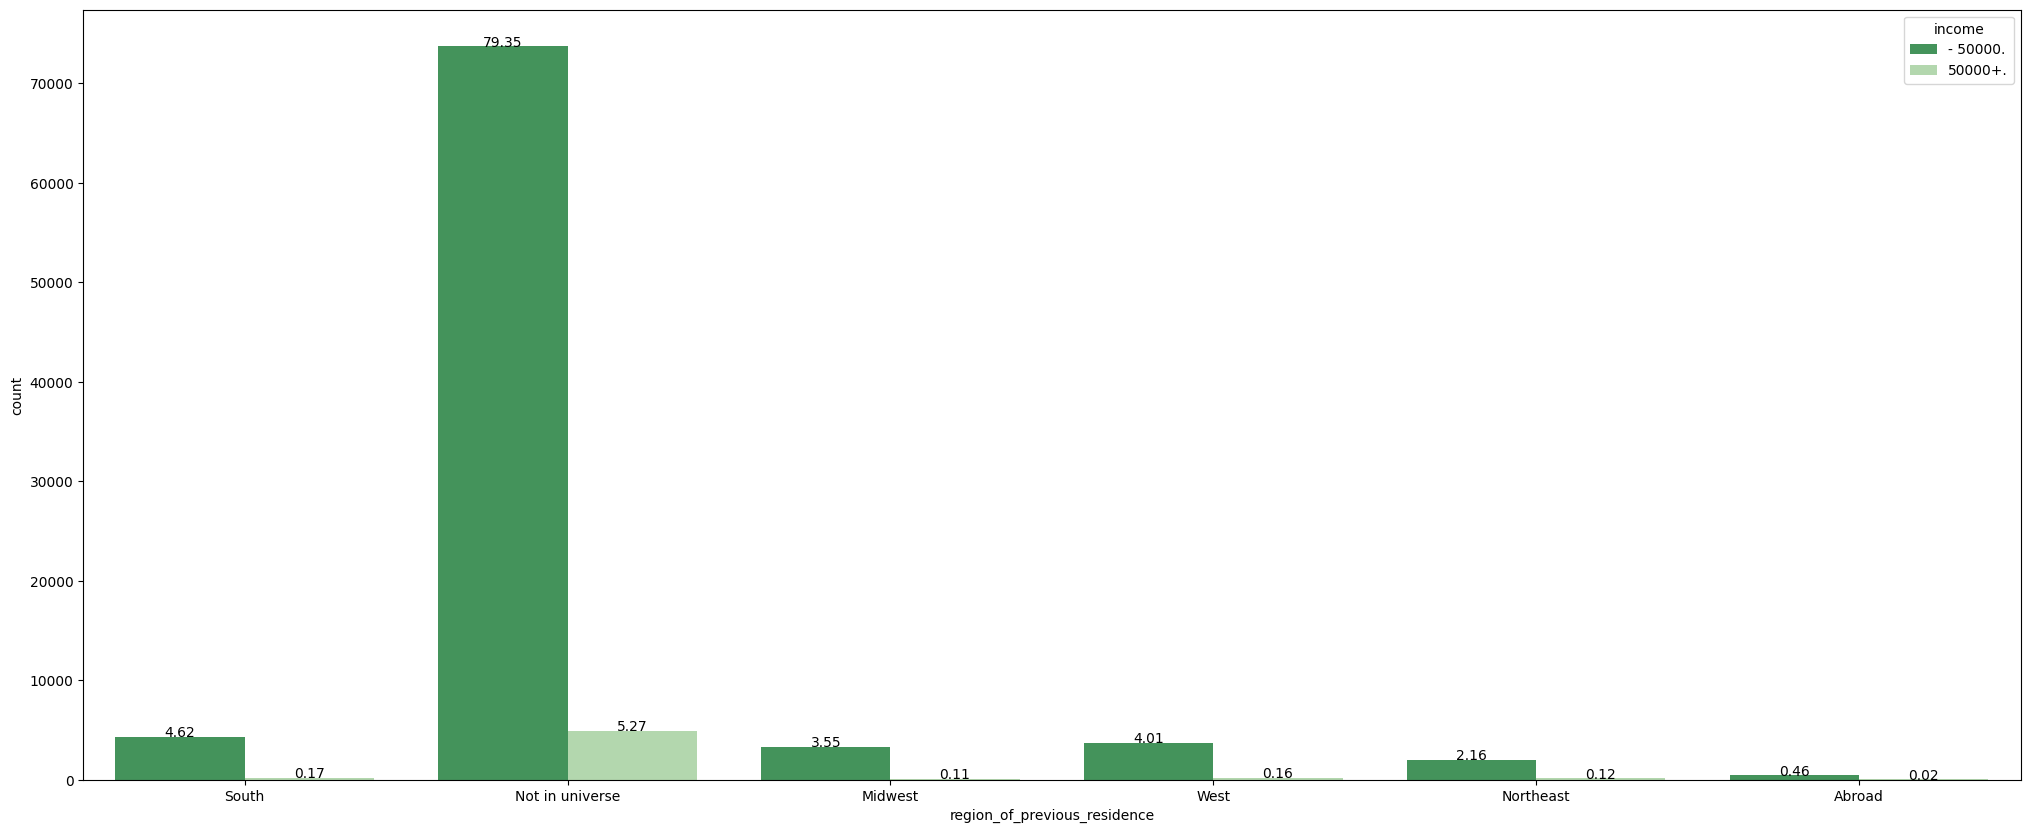

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='region_of_previous_residence',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that there are more no of people in not in universe for region_of_previous_residence so we can drop this feature

#### state_of_previous_residence

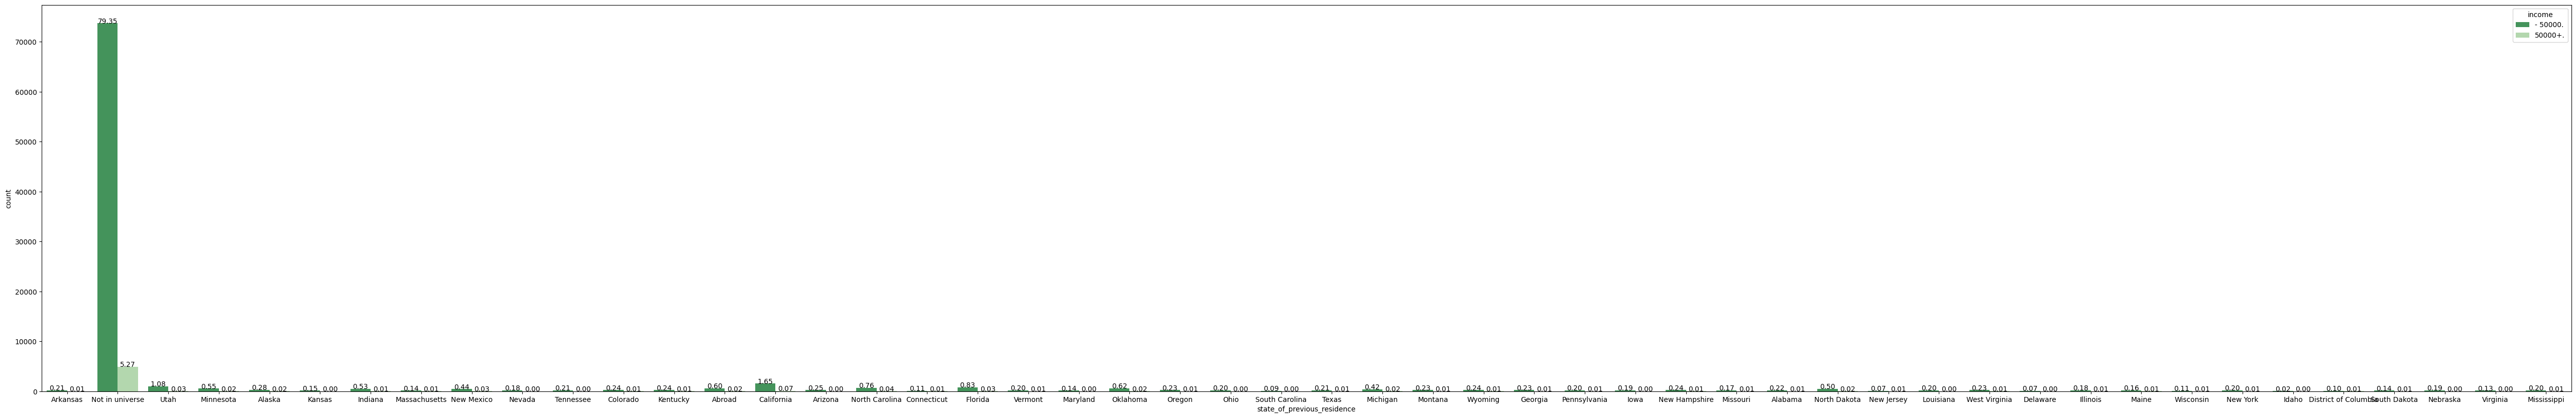

In [ ]:
plt.figure(figsize=(65,10))

a= float(len(['income']))

a= sns.countplot(x='state_of_previous_residence',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- there are 84% of the people not in universe for state_of_previous_residence so we can drop this feature

#### detailed_household_and_family_stat

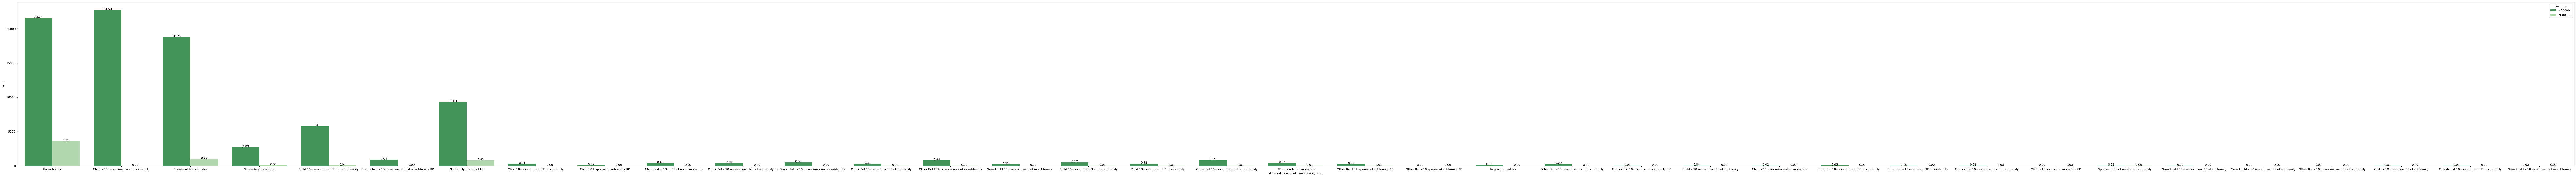

In [ ]:
plt.figure(figsize=(155,10))

a= float(len(['income']))

a= sns.countplot(x='detailed_household_and_family_stat',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- House holder are more in number

In [ ]:
nom_fea.append('detailed_household_and_family_stat')

#### detailed_household_summary_in_household

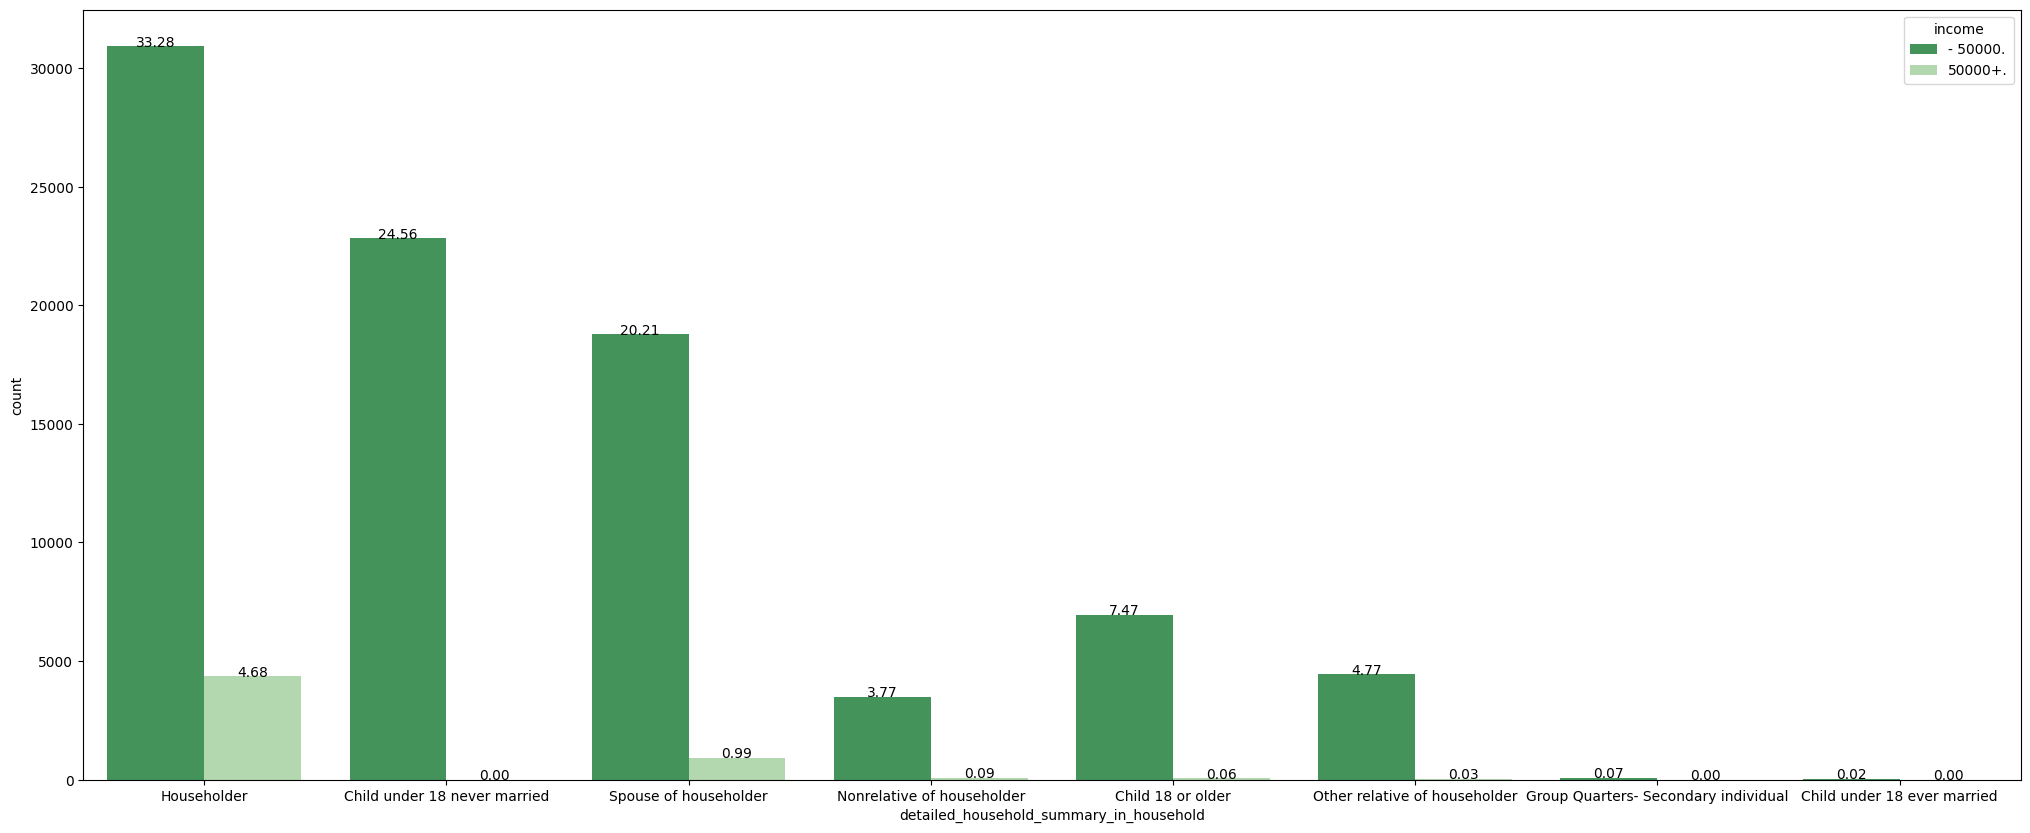

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='detailed_household_summary_in_household',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- House holder are more in number. and they earn less than 50k


In [ ]:
nom_fea.append('detailed_household_summary_in_household')

#### migration_code_change_in_msa

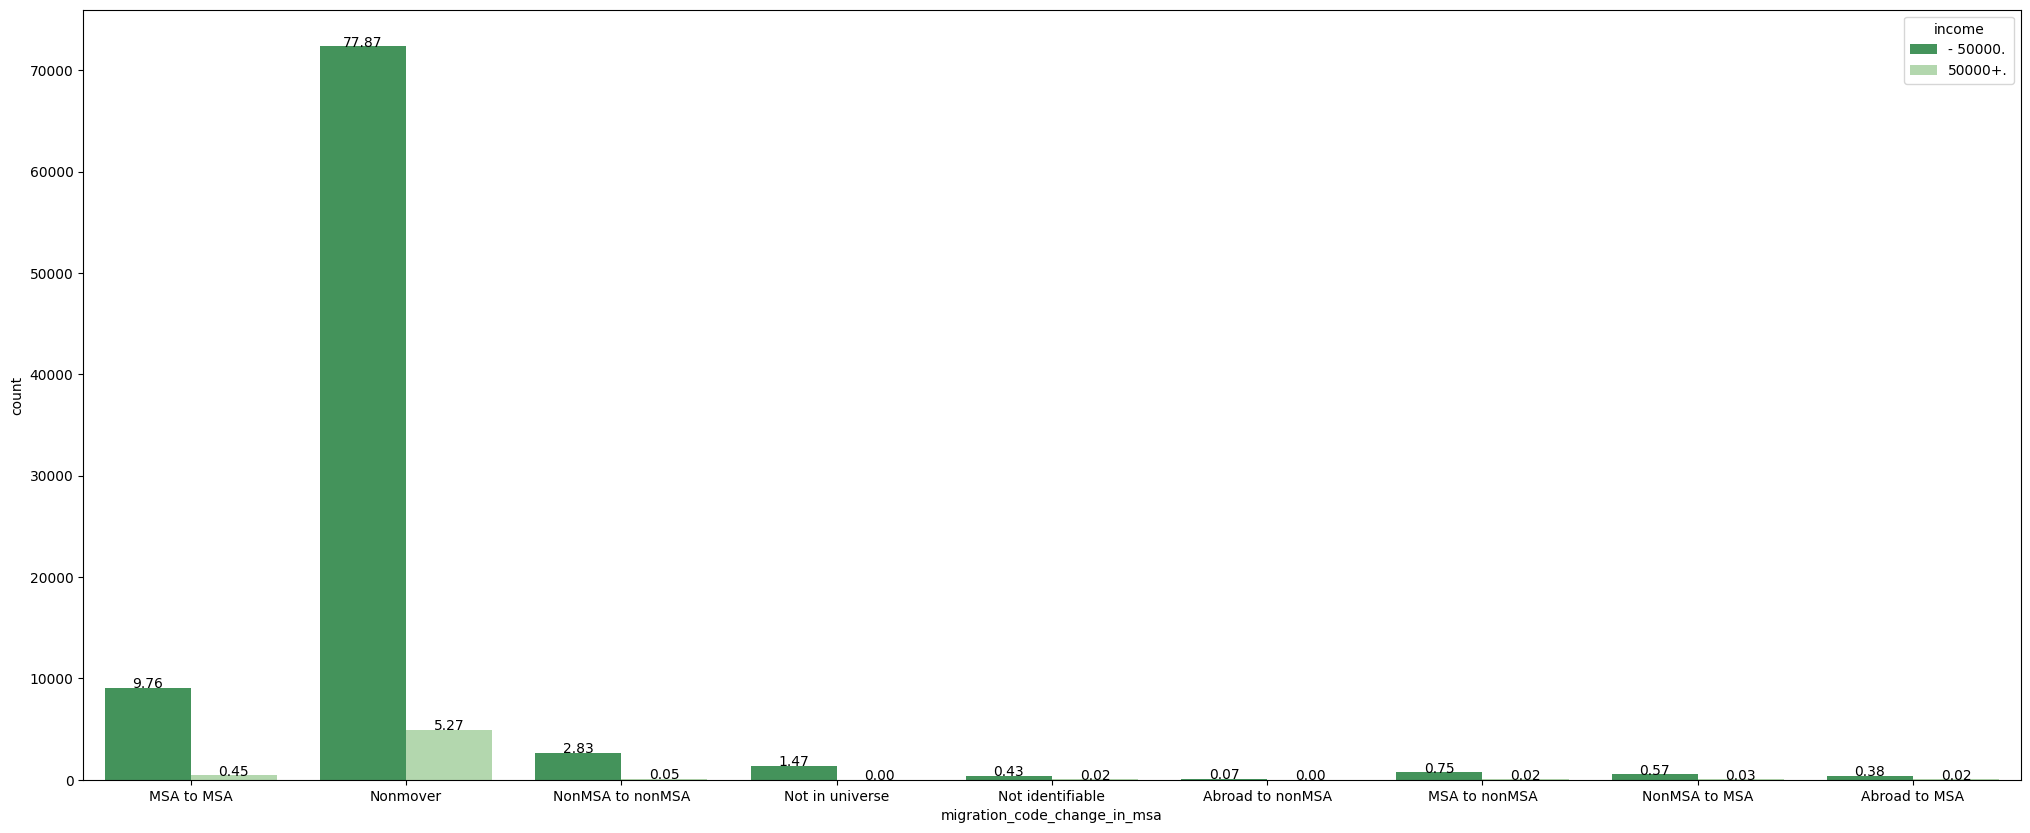

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='migration_code_change_in_msa',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see nonmover are more in number

In [ ]:
nom_fea.append('migration_code_change_in_msa')

#### migration_code_change_in_reg

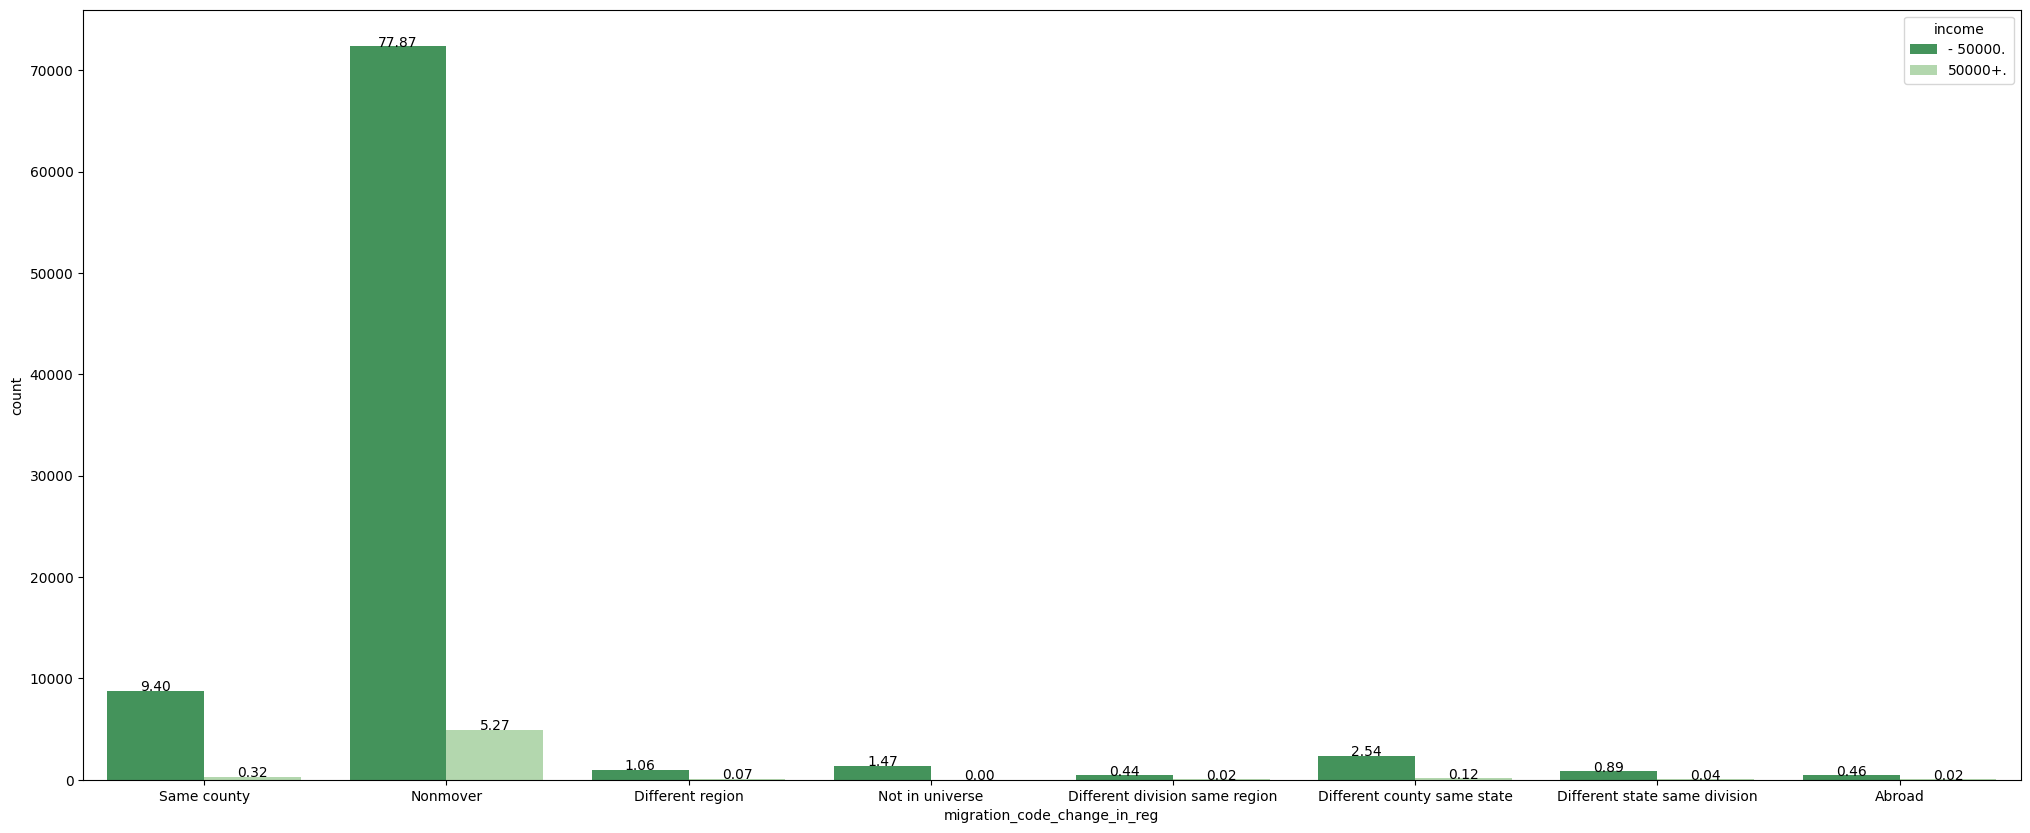

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='migration_code_change_in_reg',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that there are more number of nonmover in migration_code_change_in_reg

In [ ]:
nom_fea.append('migration_code_change_in_reg')

### migration_code_move_within_reg

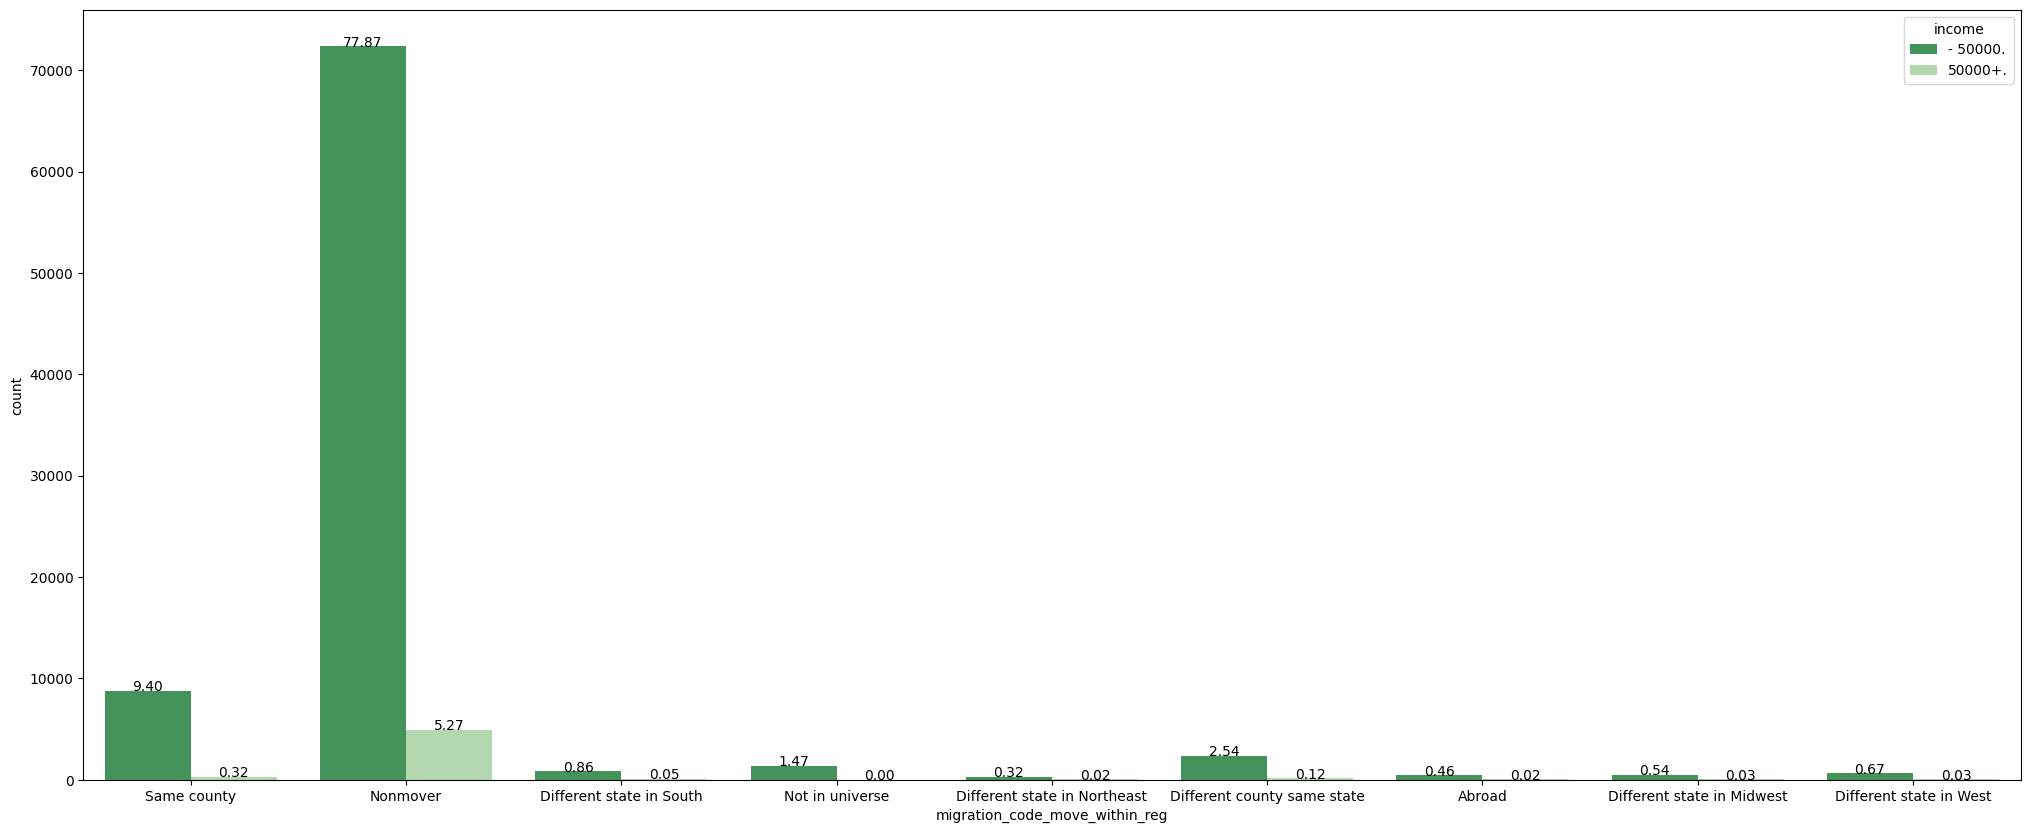

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='migration_code_move_within_reg',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- in migration_code_move_within_reg also nonmover are more in number

In [ ]:
nom_fea.append('migration_code_move_within_reg')


#### live_in_this_house_1_year_ago



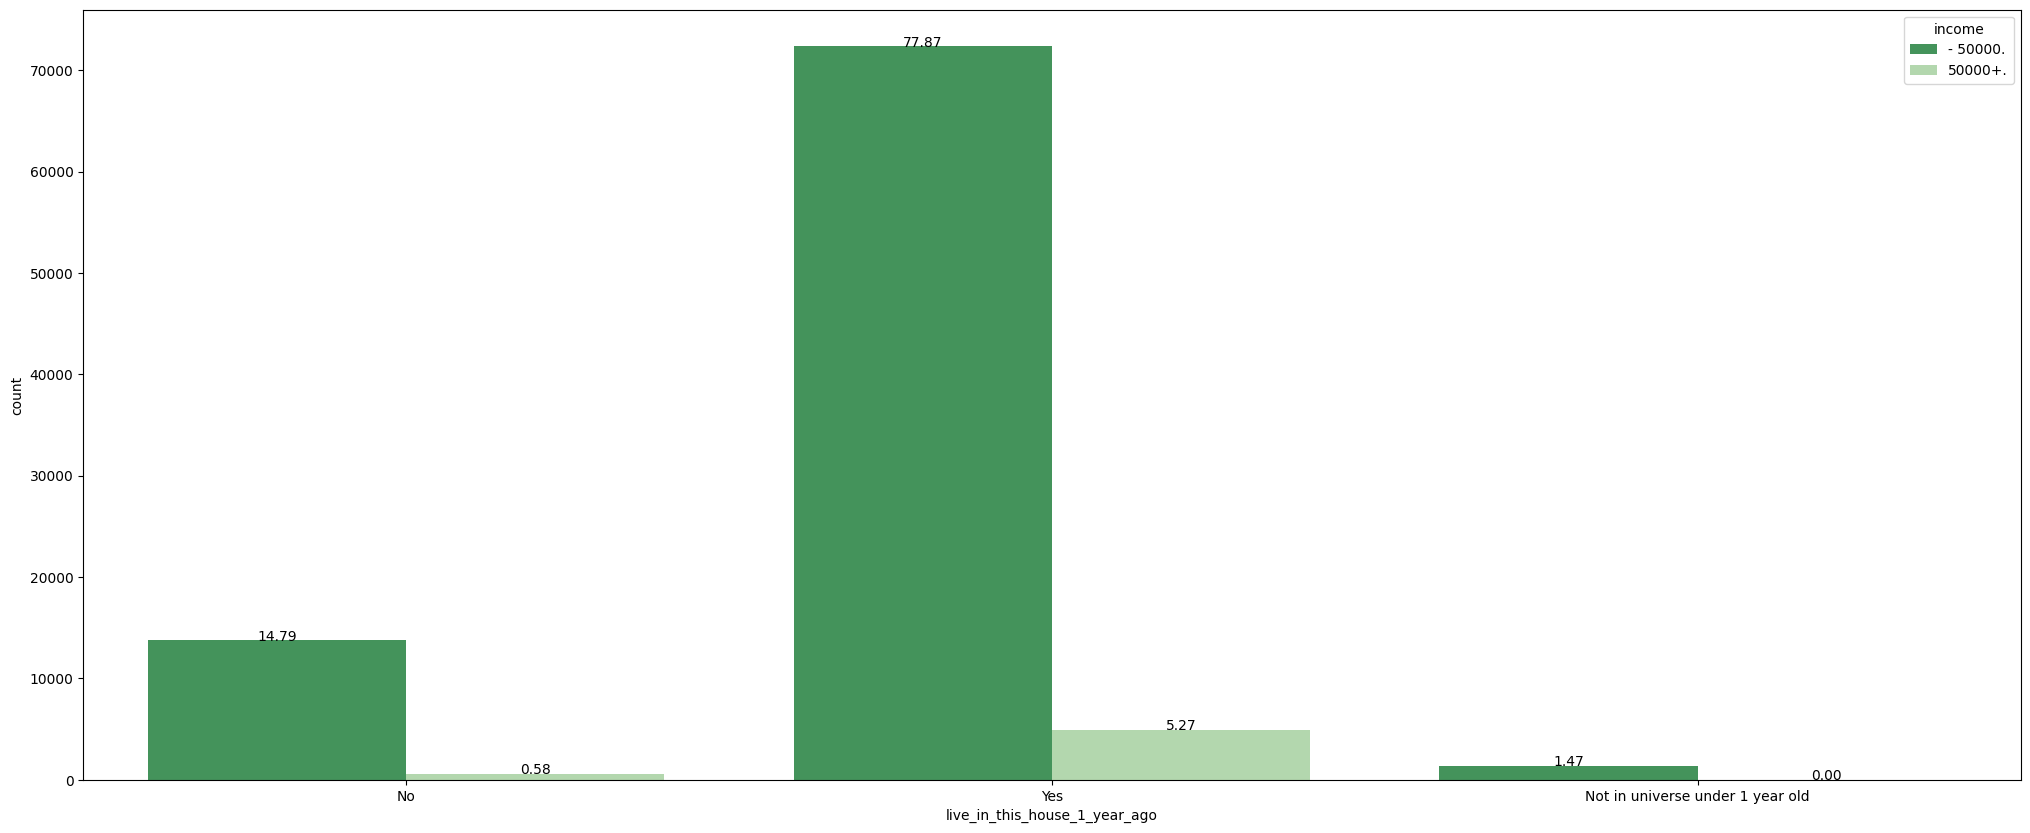

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='live_in_this_house_1_year_ago',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- live in this house 1 year ago is  true for most of the cases

In [ ]:
nom_fea.append('live_in_this_house_1_year_ago')

#### migration_prev_res_in_sunbelt


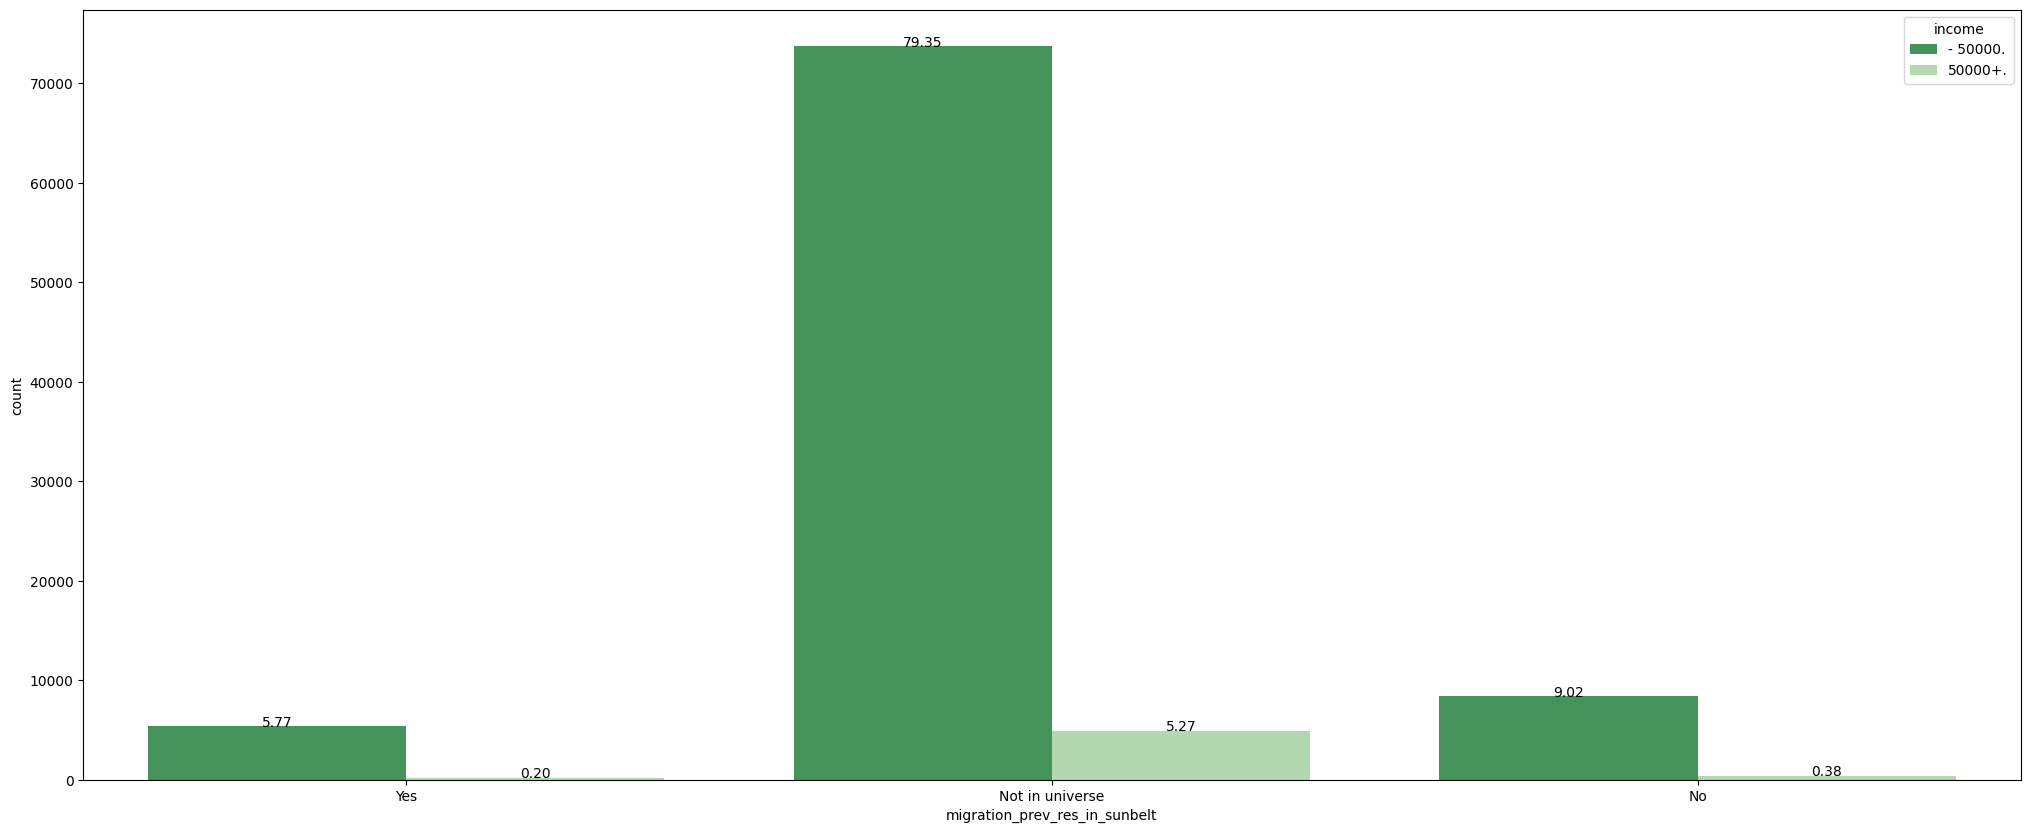

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='migration_prev_res_in_sunbelt',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- in  migration_prev_res_in_sunbelt not in universe people are more so we can say that we acn drop this feature

#### family_members_under_18

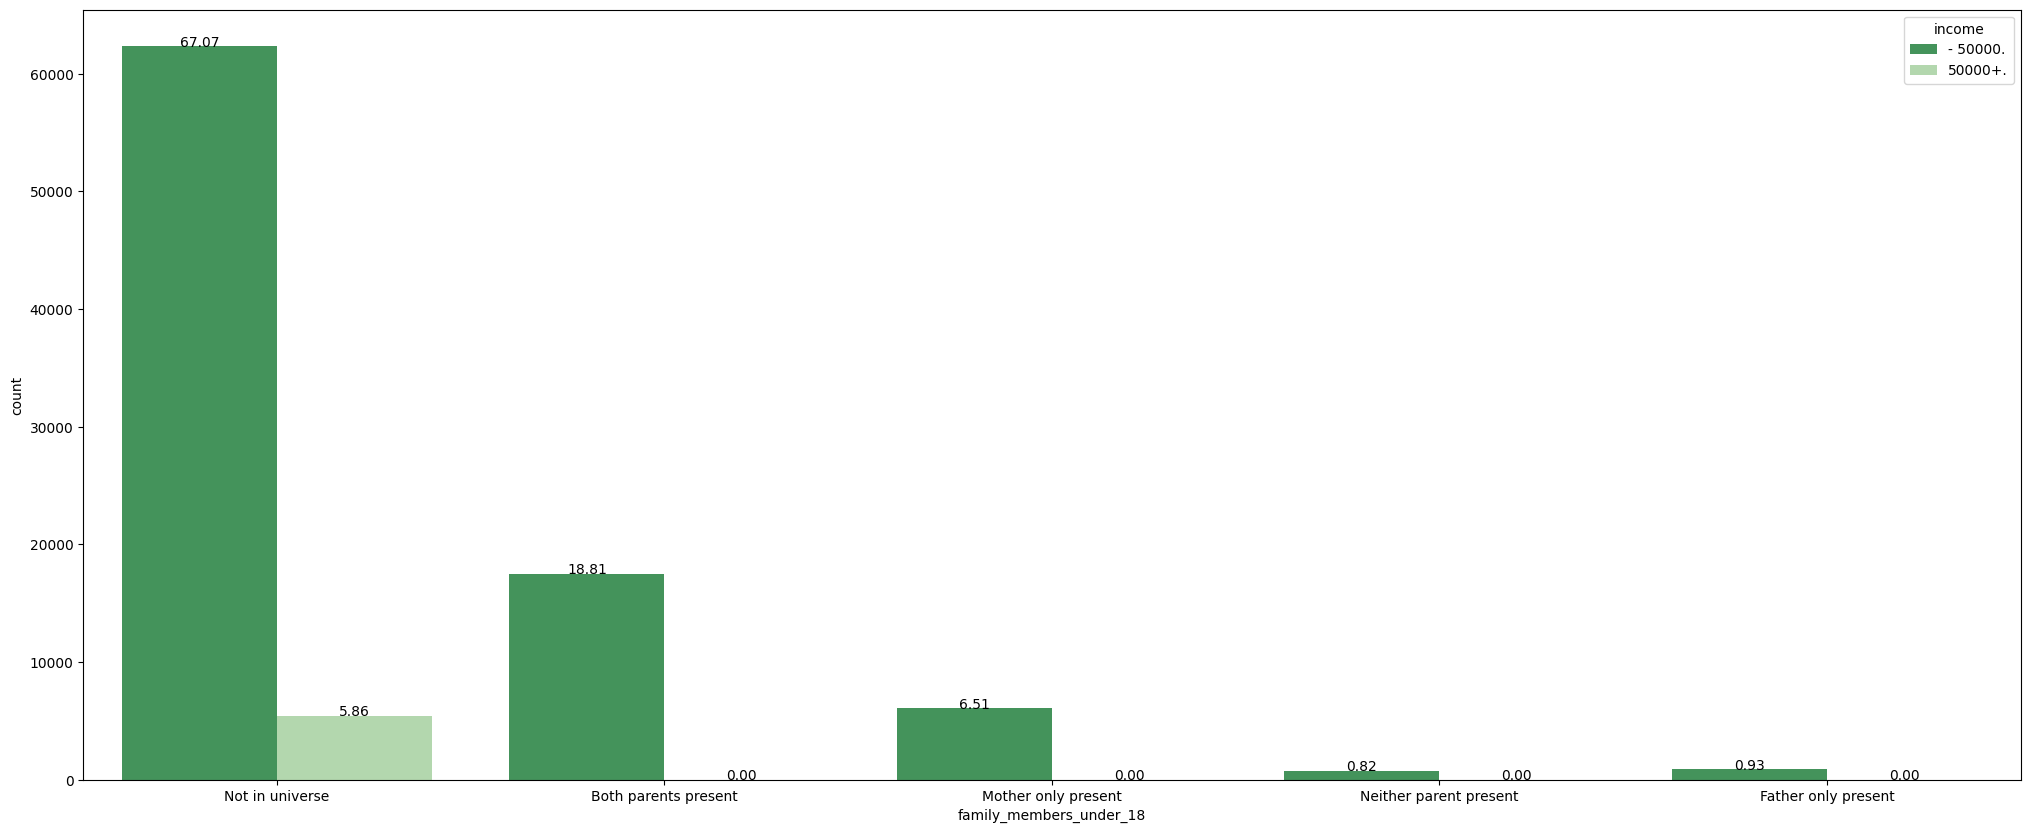

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='family_members_under_18',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- There are more no of people in not in universe who have family_members_under_18 so we acn drop the feature

### country_of_birth_father

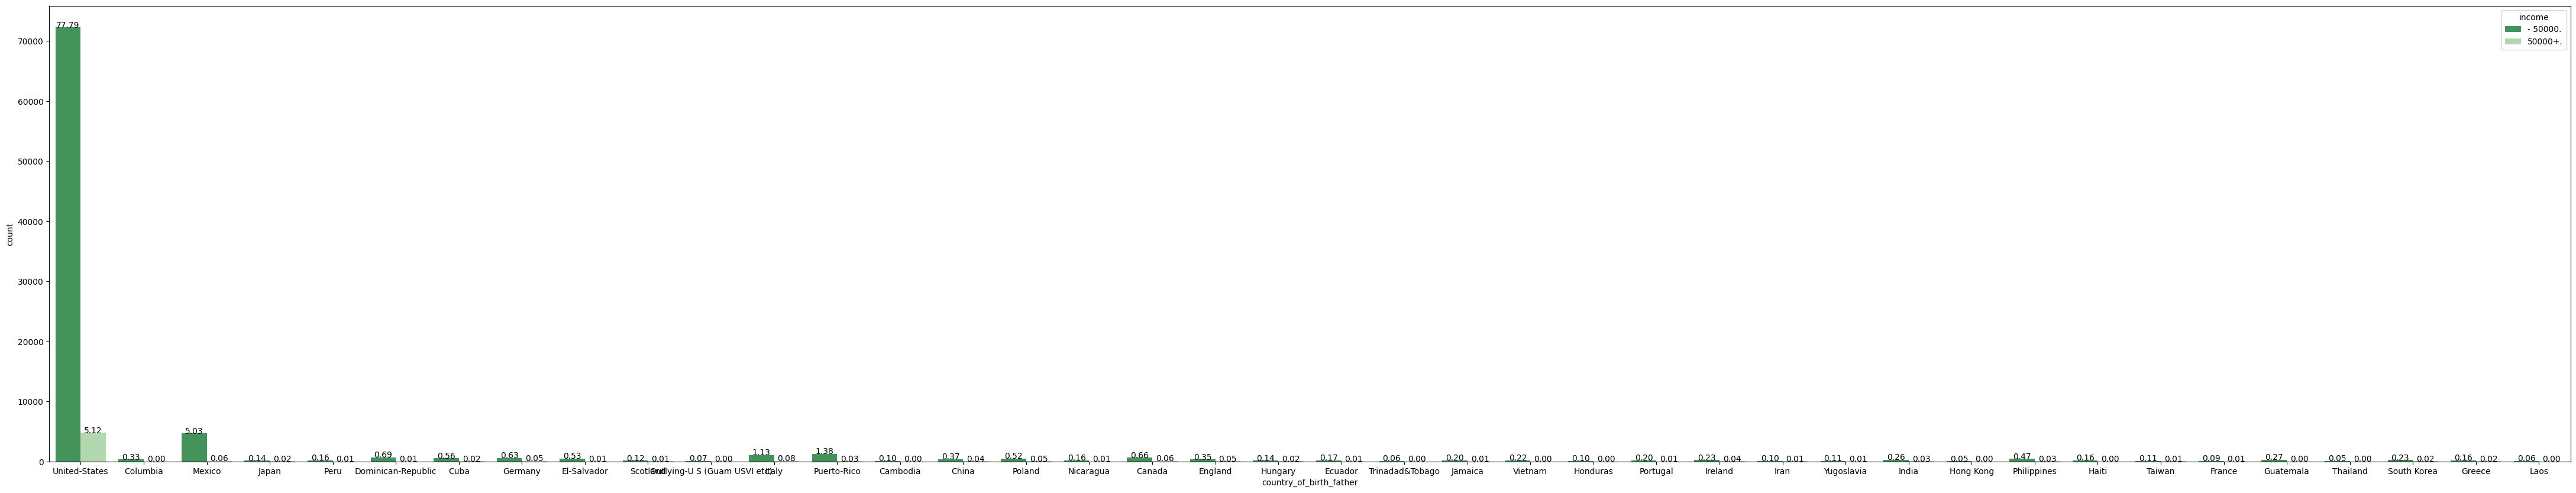

In [ ]:
plt.figure(figsize=(55,10))

a= float(len(['income']))

a= sns.countplot(x='country_of_birth_father',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- for usa country of birth of father is more

In [ ]:
nom_fea.append('country_of_birth_father')

#### country_of_birth_mother

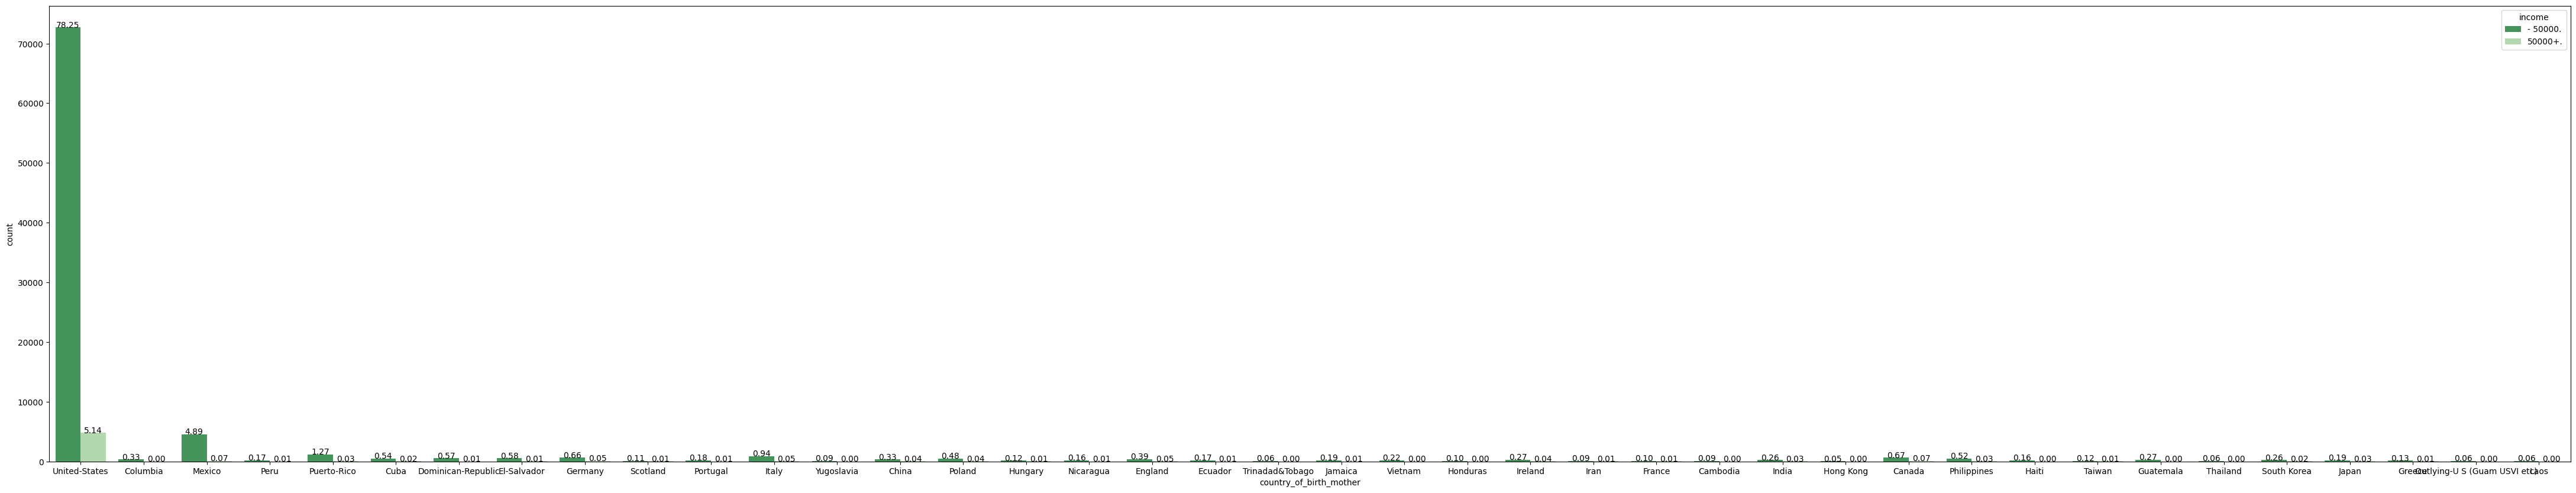

In [ ]:
plt.figure(figsize=(55,10))

a= float(len(['income']))

a= sns.countplot(x='country_of_birth_mother',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- country of birth of mother is more in usa

In [ ]:
nom_fea.append('country_of_birth_mother')

#### country_of_birth_self

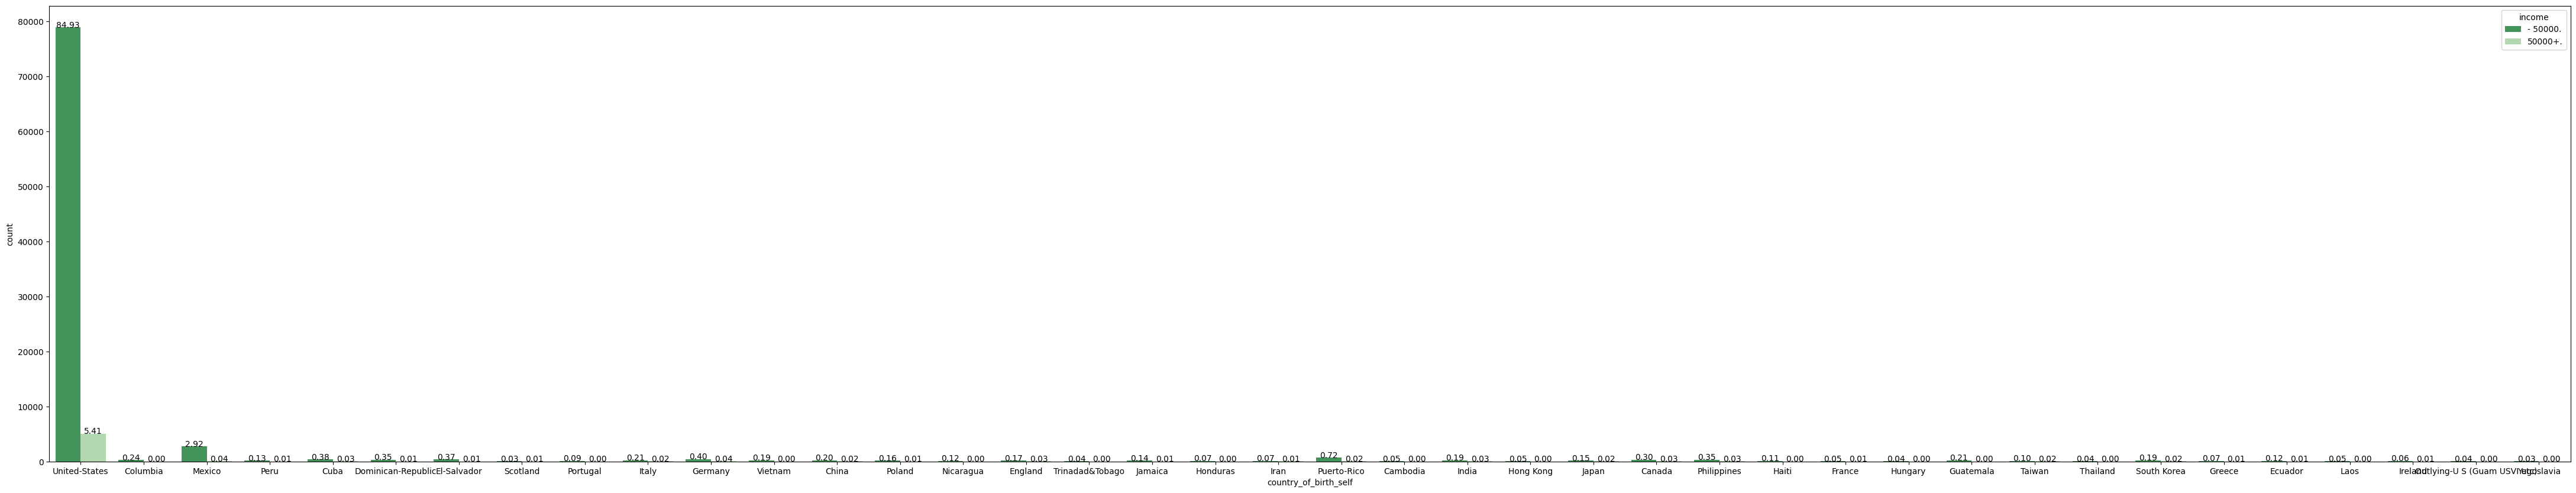

In [ ]:
plt.figure(figsize=(55,10))

a= float(len(['income']))

a= sns.countplot(x='country_of_birth_self',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- country of birth of self is more in usa


- we can say that country of birth of mother,father and self are almost same in statistics so the are interrelated so three of them are important feature

In [ ]:
nom_fea.append('country_of_birth_self')

#### citizenship

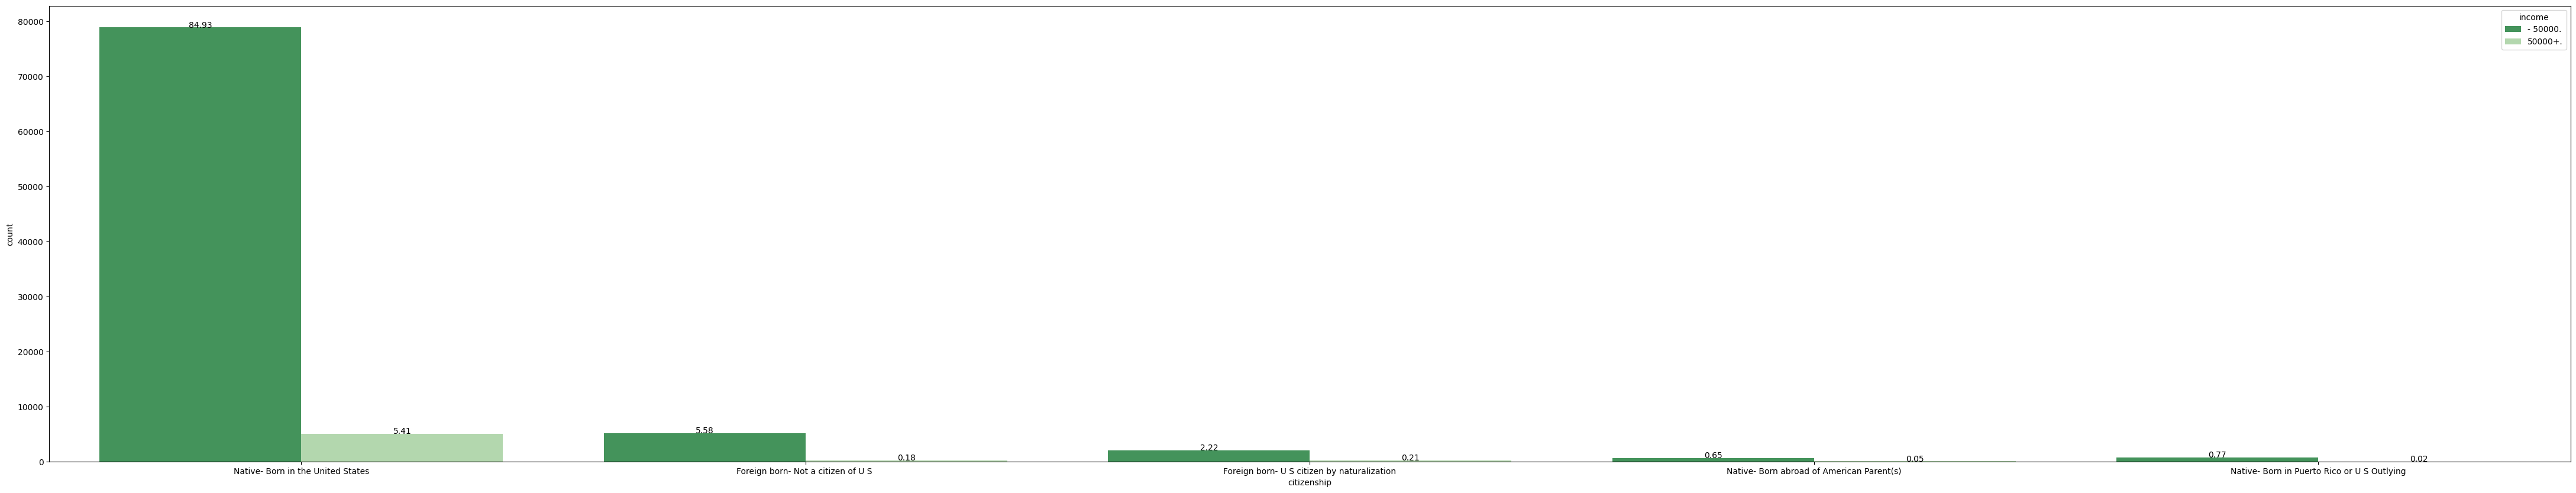

In [ ]:
plt.figure(figsize=(55,10))

a= float(len(['income']))

a= sns.countplot(x='citizenship',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that for citizenship native born in usa are more

In [ ]:
nom_fea.append('citizenship')

#### fill_inc_questionnaire_for_veterans_admin

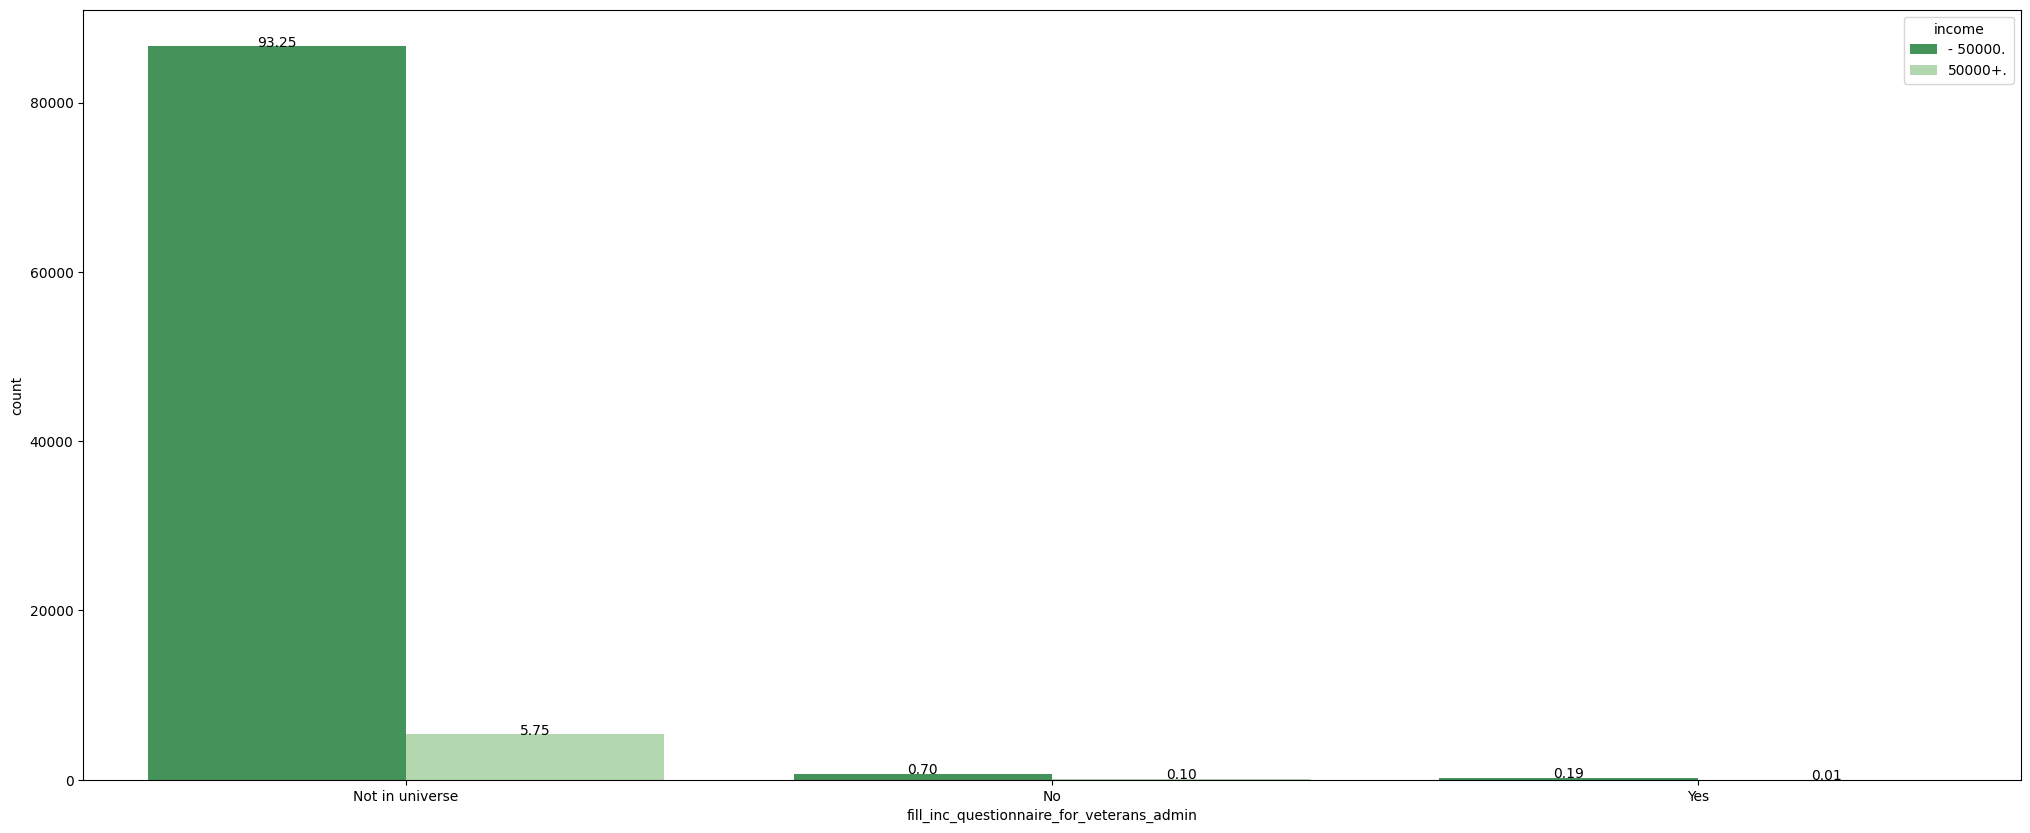

In [ ]:
plt.figure(figsize=(25,10))

a= float(len(['income']))

a= sns.countplot(x='fill_inc_questionnaire_for_veterans_admin',data=dataset,hue = dataset['income'], palette='Greens_r')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

- we can see that for fill_inc_questionnaire_for_veterans_admin not in universe is more so drop this feature

In [ ]:
nom_fea

['class_of_worker',
 'education',
 'marital_status',
 'race',
 'sex',
 'tax_filer_status',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_code_change_in_msa',
 'migration_code_change_in_reg',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'live_in_this_house_1_year_ago',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship']

In [ ]:
dataset.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.000000,92925.0
mean,34.467119,15.559666,11.620264,56.542351,400.830175,37.744202,190.741727,1728.719139,1.950358,0.175217,1.528727,23.507732,94.0
std,22.069257,18.058396,14.574197,280.652385,4429.638121,272.180188,1945.171465,974.982892,2.338996,0.554323,0.842912,24.413822,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.290000,0.000000,0.000000,0.000000,0.000000,94.0
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1066.060000,0.000000,0.000000,2.000000,0.000000,94.0
50%,33.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1625.300000,1.000000,0.000000,2.000000,10.000000,94.0
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2162.970000,4.000000,0.000000,2.000000,52.000000,94.0
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4356.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,94.0


In [ ]:
dis_fea

['age', 'instance_weight', 'industry_code', 'occupation_code']

### Corelation_matrix between different discrete feature

In [ ]:
corelation=pd.DataFrame()

In [ ]:
corelation['age']=dataset['age']
corelation['instance_weight']=dataset['instance_weight']
corelation['industry_code']=dataset['industry_code']
corelation['occupation_code']=dataset['occupation_code']

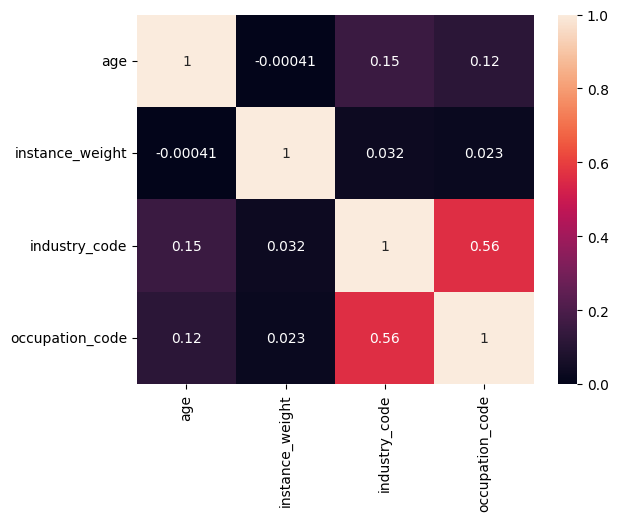

In [ ]:
corr_matrix = corelation.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Feature extraction

In [ ]:
data=dataset.copy()

In [ ]:
data.drop('wage_per_hour',axis = 1,inplace = True)
data.drop('capital_gains',axis = 1,inplace = True)
data.drop('capital_losses',axis = 1,inplace = True)
data.drop('divdends_from_stocks',axis = 1,inplace = True)
data.drop('num_persons_worked_for_employer',axis = 1,inplace = True)
data.drop('own_business_or_self_employed',axis = 1,inplace = True)
data.drop('veterans_benefits',axis = 1,inplace = True)
data.drop('weeks_worked_in_year',axis = 1,inplace = True)
data.drop('enrolled_in_edu_inst_last_wk',axis = 1,inplace = True)
data.drop('major_industry_code',axis = 1,inplace = True)
data.drop('major_occupation_code',axis = 1,inplace = True)
data.drop('hispanic_Origin',axis = 1,inplace = True)
data.drop('member_of_a_labor_union',axis = 1,inplace = True)
data.drop('reason_for_unemployment',axis = 1,inplace = True)
data.drop('full_or_part_time_employment_stat',axis = 1,inplace = True)
data.drop('region_of_previous_residence',axis = 1,inplace = True)
data.drop('state_of_previous_residence',axis = 1,inplace = True)
data.drop('migration_prev_res_in_sunbelt',axis = 1,inplace = True)
data.drop('family_members_under_18',axis = 1,inplace = True)
data.drop('fill_inc_questionnaire_for_veterans_admin',axis = 1,inplace = True)

#### WHY DO WE DROP ALL THIS FEATURE?
- NO SUCH VARIATION-{'wage_per_hour','capital_gains','capital_losses',
'divdends_from_stocks',
'num_persons_worked_for_employer',
'own_business_or_self_employed',
'veterans_benefits',
'weeks_worked_in_yea} here more than 50% data have value 0.


- Not in Universe/not defined:{member_of_a_labor_union',
'reason_for_unemployment',
'full_or_part_time_employment_stat',
'region_of_previous_residence',
'state_of_previous_residence',
'migration_prev_res_in_sunbelt',
'family_members_under_18',
'fill_inc_questionnaire_for_veterans_admin'}


that is why we drop all this feature as they have absolutely have no importance in our dataset.

In [ ]:

one_hot_encoded_data = pd.get_dummies(data, columns = ['class_of_worker',
 'education',
 'marital_status',
 'race',
 'sex',
 'tax_filer_status',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_code_change_in_msa',
 'migration_code_change_in_reg',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'live_in_this_house_1_year_ago',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship'])

one_hot_encoded_data.head()


,age,industry_code,occupation_code,instance_weight,year,income,class_of_worker_Federal government,class_of_worker_Local government,class_of_worker_Never worked,class_of_worker_Not in universe,...,country_of_birth_self_Thailand,country_of_birth_self_Trinadad&Tobago,country_of_birth_self_United-States,country_of_birth_self_Vietnam,country_of_birth_self_Yugoslavia,citizenship_Foreign born- Not a citizen of U S,citizenship_Foreign born- U S citizen by naturalization,citizenship_Native- Born abroad of American Parent(s),citizenship_Native- Born in Puerto Rico or U S Outlying,citizenship_Native- Born in the United States
1,58,4,34,1053.55,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,9,0,0,1758.14,94,- 50000.,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,10,0,0,1069.16,94,- 50000.,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
6,42,34,3,1535.86,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,34,4,37,1146.79,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df=one_hot_encoded_data.copy()

In [ ]:
df.head()

,age,industry_code,occupation_code,instance_weight,year,income,class_of_worker_Federal government,class_of_worker_Local government,class_of_worker_Never worked,class_of_worker_Not in universe,...,country_of_birth_self_Thailand,country_of_birth_self_Trinadad&Tobago,country_of_birth_self_United-States,country_of_birth_self_Vietnam,country_of_birth_self_Yugoslavia,citizenship_Foreign born- Not a citizen of U S,citizenship_Foreign born- U S citizen by naturalization,citizenship_Native- Born abroad of American Parent(s),citizenship_Native- Born in Puerto Rico or U S Outlying,citizenship_Native- Born in the United States
1,58,4,34,1053.55,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,9,0,0,1758.14,94,- 50000.,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,10,0,0,1069.16,94,- 50000.,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
6,42,34,3,1535.86,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,34,4,37,1146.79,94,- 50000.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df['income']

1         - 50000.
3         - 50000.
4         - 50000.
6         - 50000.
9         - 50000.
            ...   
199509     50000+.
199510    - 50000.
199514    - 50000.
199516    - 50000.
199519    - 50000.
Name: income, Length: 92925, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92925 entries, 1 to 199519
Columns: 260 entries, age to citizenship_Native- Born in the United States
dtypes: float64(1), int64(4), object(1), uint8(254)
memory usage: 29.5+ MB


In [ ]:
X = df.drop('income', axis = 1)
y = df['income']
# standardizing the dataframe
X = StandardScaler().fit_transform(X)
X.shape

(92925, 259)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

### LOGISTIC REGRESSION

In [ ]:
modelLG = LogisticRegression()
modelLG.fit(x_train, y_train)
y_predict = modelLG.predict(x_test)
print('Accuracy=',accuracy_score(y_test, y_predict))

Accuracy= 0.9501748722087705


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

    - 50000.       0.96      0.99      0.97     17515
     50000+.       0.65      0.29      0.40      1070

    accuracy                           0.95     18585
   macro avg       0.81      0.64      0.69     18585
weighted avg       0.94      0.95      0.94     18585



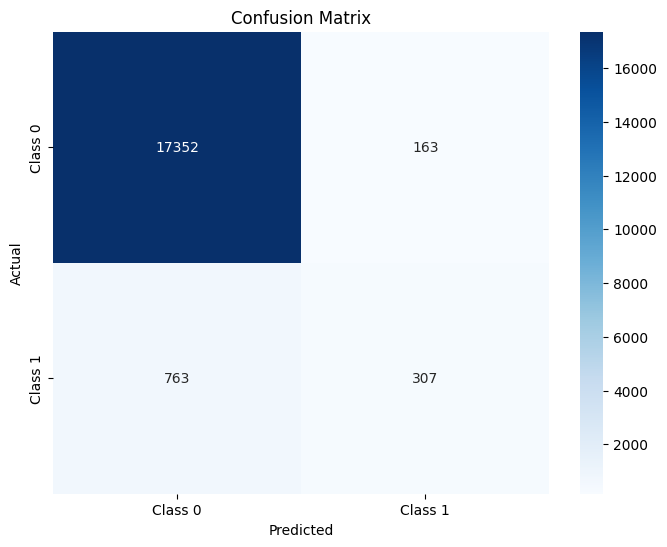

In [ ]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()